In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import Name_resolver
import CococoNet_reader
import os
from scipy import sparse
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)


In [2]:
np.random.seed(401)

In [3]:
def get_one_to_ones(Species_1 = 'rice',Species_2 = 'maize'):

    import pandas as pd

    import CococoNet_reader
    #Get Species Names in Common form 
    common_name_1 = Name_resolver.species_name_resolver(Species_1,'common')
    common_name_2 = Name_resolver.species_name_resolver(Species_2,'common')

    if common_name_1 == 'rice':
        common_name_1 = 'rice_jp'
    if common_name_2 == 'rice':
        common_name_2 ='rice_jp'
    file_list = os.listdir('/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species')
    spec_1_filter = [i for i in file_list if common_name_1 in i]
    spec_2_filter = [i for i in spec_1_filter if common_name_2 in i]
    current_location = '/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species/' + spec_2_filter[0]
    
    cross_species_n_m_genes = pd.read_csv(current_location)

    ### Get one to ones
    cross_species_map_one_to_one = cross_species_n_m_genes.drop_duplicates(subset=common_name_1 + ' Symbol', keep= False,)
    cross_species_map_one_to_one = cross_species_map_one_to_one.drop_duplicates(subset= common_name_2 + ' Symbol', keep= False)
    return cross_species_map_one_to_one

In [4]:
co_expressalog_map_85 = pd.read_csv('/data/passala/Coexpressolog_paper_data/Updated_with_V_11/Species_species_gene_tables/rice_maize_lenient_coexpressalog_table.csv')
co_expressalog_map_85 = co_expressalog_map_85.rename(columns = {'rice_jp gene':'Rice Gene','maize gene':'Maize Gene'})
co_expressalog_map_85

Rice Gene      Maize Gene
0     Os05g0333200  Zm00001d027886
1     Os02g0592300  Zm00001d050929
2     Os03g0858100  Zm00001d012815
3     Os07g0448100  Zm00001d019565
4     Os07g0554900  Zm00001d021744
...            ...             ...
6213  Os03g0280400  Zm00001d047779
6214  Os11g0123400  Zm00001d052378
6215  Os01g0775400  Zm00001d043293
6216  Os05g0519500  Zm00001d038807
6217  Os01g0834500  Zm00001d010566

[6218 rows x 2 columns]

In [5]:
one_to_ones = get_one_to_ones()
one_to_ones = one_to_ones.rename(columns = {'rice_jp Symbol':'Rice Gene','maize Symbol':'Maize Gene'})[['Maize Gene','Rice Gene']]
one_to_ones ['Coexpressalog'] = 'No'

In [6]:
co_expressalog_map_85.merge(on = ['Maize Gene','Rice Gene'], right = one_to_ones)
co_expressalog_map_85['Coexpressalog'] = 'Yes'

In [7]:
combined_matches = pd.concat([co_expressalog_map_85,one_to_ones],ignore_index = True)
combined_matches

Rice Gene      Maize Gene Coexpressalog
0      Os05g0333200  Zm00001d027886           Yes
1      Os02g0592300  Zm00001d050929           Yes
2      Os03g0858100  Zm00001d012815           Yes
3      Os07g0448100  Zm00001d019565           Yes
4      Os07g0554900  Zm00001d021744           Yes
...             ...             ...           ...
11838    LOC4340090  Zm00001d045383            No
11839    LOC4326933    LOC100382750            No
11840  Os02g0232400    LOC100275174            No
11841    LOC4329688    LOC100275271            No
11842  Os05g0519500  Zm00001d038807            No

[11843 rows x 3 columns]

In [8]:
co_expressalog_map_85 = combined_matches.drop_duplicates(subset = ['Rice Gene','Maize Gene'], keep = False)
co_expressalog_map_85

Rice Gene      Maize Gene Coexpressalog
2      Os03g0858100  Zm00001d012815           Yes
3      Os07g0448100  Zm00001d019565           Yes
4      Os07g0554900  Zm00001d021744           Yes
6      Os01g0588200  Zm00001d020219           Yes
7      Os11g0562100  Zm00001d015239           Yes
...             ...             ...           ...
11837  Os12g0638900    LOC100272697            No
11838    LOC4340090  Zm00001d045383            No
11839    LOC4326933    LOC100382750            No
11840  Os02g0232400    LOC100275174            No
11841    LOC4329688    LOC100275271            No

[8257 rows x 3 columns]

In [9]:
co_expressalog_map_85 = co_expressalog_map_85.loc[co_expressalog_map_85['Coexpressalog'] == 'Yes']
co_expressalog_map_85

Rice Gene      Maize Gene Coexpressalog
2     Os03g0858100  Zm00001d012815           Yes
3     Os07g0448100  Zm00001d019565           Yes
4     Os07g0554900  Zm00001d021744           Yes
6     Os01g0588200  Zm00001d020219           Yes
7     Os11g0562100  Zm00001d015239           Yes
...            ...             ...           ...
6212  Os10g0494800  Zm00001d032598           Yes
6213  Os03g0280400  Zm00001d047779           Yes
6214  Os11g0123400  Zm00001d052378           Yes
6215  Os01g0775400  Zm00001d043293           Yes
6217  Os01g0834500  Zm00001d010566           Yes

[4425 rows x 3 columns]

In [10]:
co_expressalog_map_85 = co_expressalog_map_85.drop_duplicates(subset = 'Rice Gene')
co_expressalog_map_85 = co_expressalog_map_85.drop_duplicates(subset = 'Maize Gene')
co_expressalog_map_85

Rice Gene      Maize Gene Coexpressalog
2     Os03g0858100  Zm00001d012815           Yes
3     Os07g0448100  Zm00001d019565           Yes
4     Os07g0554900  Zm00001d021744           Yes
6     Os01g0588200  Zm00001d020219           Yes
7     Os11g0562100  Zm00001d015239           Yes
...            ...             ...           ...
6212  Os10g0494800  Zm00001d032598           Yes
6213  Os03g0280400  Zm00001d047779           Yes
6214  Os11g0123400  Zm00001d052378           Yes
6215  Os01g0775400  Zm00001d043293           Yes
6217  Os01g0834500  Zm00001d010566           Yes

[4425 rows x 3 columns]

In [11]:
maize_cccnt = CococoNet_reader.read_cococonet('maize')


In [12]:
rice_sc_data = sc.read_10x_mtx('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Rice_japonica/Cell_ranger_results/Rice_paper/outs/filtered_feature_bc_matrix',cache=True)

... reading from cache file cache/data-passala-Collaborator_Data-GEO_sourced_single_cell_for_CRUSH-Rice_japonica-Cell_ranger_results-Rice_paper-outs-filtered_feature_bc_matrix-matrix.h5ad


In [13]:
maize_Data = sc.read_10x_mtx('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Maize_nitrate_root_SC/Cell_ranger_output_folder/Full_output/cells_with_nitrate/outs/filtered_feature_bc_matrix', cache = True)

... reading from cache file cache/data-passala-Collaborator_Data-GEO_sourced_single_cell_for_CRUSH-Maize_nitrate_root_SC-Cell_ranger_output_folder-Full_output-cells_with_nitrate-outs-filtered_feature_bc_matrix-matrix.h5ad


In [14]:
rice_sc_data

AnnData object with n_obs × n_vars = 14943 × 37863
    var: 'gene_ids', 'feature_types'

In [15]:
rice_sc_data.var

gene_ids    feature_types
Os01g0100100  Os01g0100100  Gene Expression
Os01g0100200  Os01g0100200  Gene Expression
Os01g0100300  Os01g0100300  Gene Expression
Os01g0100400  Os01g0100400  Gene Expression
Os01g0100466  Os01g0100466  Gene Expression
...                    ...              ...
Os12g0641200  Os12g0641200  Gene Expression
Os12g0641300  Os12g0641300  Gene Expression
Os12g0641400  Os12g0641400  Gene Expression
Os12g0641500  Os12g0641500  Gene Expression
Os12g0641600  Os12g0641600  Gene Expression

[37863 rows x 2 columns]

In [16]:
sc.pp.filter_cells(rice_sc_data, min_genes=200)

In [17]:
rice_sc_data.obs.index = rice_sc_data.obs.index+'-Rice'

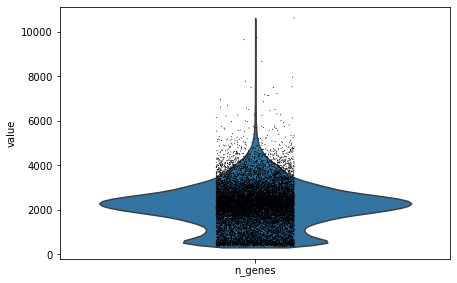

In [18]:
sc.pl.violin(rice_sc_data, ['n_genes'])

In [19]:
#rice_sc_data.obs.loc[list_of_bad_cells]

In [20]:
#rice_sc_data.obs.loc[rice_sc_data.obs.index.isin(list_of_reg_cells)].head(40)

In [21]:
maize_Data.var['In CoCoCoNet'] = 0
maize_Data.var['In CoCoCoNet'].loc[maize_Data.var['gene_ids'].isin(maize_cccnt.index)] = 1
#maize_Data = maize_Data[:,maize_Data.var['In CoCoCoNet'] == 1]
maize_Data

/tmp/ipykernel_1964571/898070478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.var['In CoCoCoNet'].loc[maize_Data.var['gene_ids'].isin(maize_cccnt.index)] = 1


AnnData object with n_obs × n_vars = 4101 × 46430
    var: 'gene_ids', 'feature_types', 'In CoCoCoNet'

In [22]:
sc.pp.filter_cells(maize_Data, min_genes=200)
sc.pp.filter_genes(maize_Data, min_cells=2)

filtered out 1 cells that have less than 200 genes expressed
filtered out 20777 genes that are detected in less than 2 cells


In [23]:
maize_Data

AnnData object with n_obs × n_vars = 4100 × 25653
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'In CoCoCoNet', 'n_cells'

In [24]:
sc.pp.normalize_total(maize_Data, target_sum=1e4)
sc.pp.log1p(maize_Data)


normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


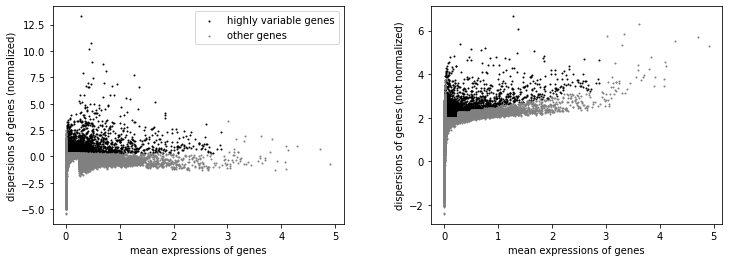

In [25]:

sc.pp.highly_variable_genes(maize_Data, min_mean=0.0125, max_mean=3, min_disp=0.3) # disp .5
sc.pl.highly_variable_genes(maize_Data)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


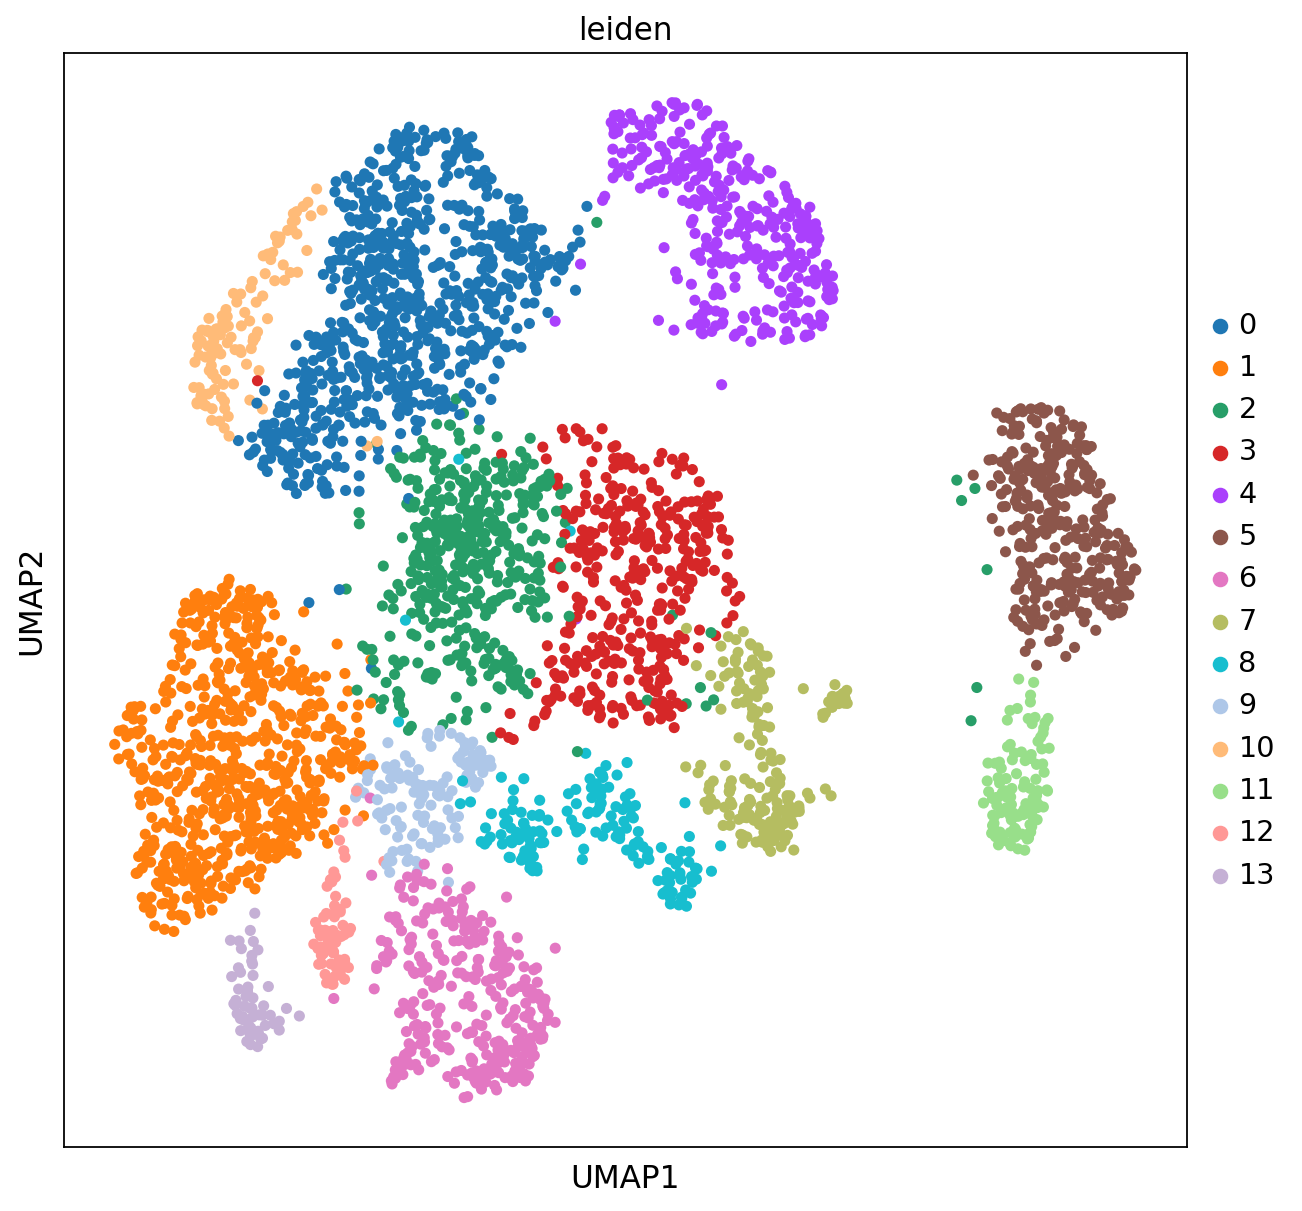

In [26]:
sc.set_figure_params(facecolor = 'white', figsize = (9,9))
sc.tl.pca(maize_Data, svd_solver='arpack', random_state= 200)
sc.pp.neighbors(maize_Data, n_neighbors=30, n_pcs=50, random_state= 500)
sc.tl.umap(maize_Data, random_state= 221)
sc.tl.leiden(maize_Data, random_state= 1000, resolution= .6)

sc.pl.umap(maize_Data, color = 'leiden', s=100)

In [27]:
maize_Data.var

gene_ids    feature_types  In CoCoCoNet  \
Zm00001d027230                 Zm00001d027230  Gene Expression             0   
Zm00001d027231                 Zm00001d027231  Gene Expression             1   
Zm00001d027233                 Zm00001d027233  Gene Expression             1   
Zm00001d027236                 Zm00001d027236  Gene Expression             1   
Zm00001d027239                 Zm00001d027239  Gene Expression             1   
...                                       ...              ...           ...   
SSU_rRNA_eukarya-106          ENSRNA049478534  Gene Expression             1   
5_8S_rRNA-57                  ENSRNA049478548  Gene Expression             0   
SSU_rRNA_eukarya-107          ENSRNA049478530  Gene Expression             1   
OVATE-transcription factor 3   Zm00001d000458  Gene Expression             0   
Zm00001d000460                 Zm00001d000460  Gene Expression             0   

                              n_cells  highly_variable     means  dispersions  \
Zm00001d027230                     67            False  0.024387     1.696221   
Zm00001d027231                    290             True  0.241811     2.104409   
Zm00001d027233                      2            False  0.000593     0.203313   
Zm00001d027236                     36             True  0.021745     2.032777   
Zm00001d027239                     60            False  0.023626     1.419417   
...                               ...              ...       ...          ...   
SSU_rRNA_eukarya-106               67             True  0.090445     2.502171   
5_8S_rRNA-57                        8            False  0.010975     2.160190   
SSU_rRNA_eukarya-107              217             True  0.307557     2.541439   
OVATE-transcription factor 3        2            False  0.000167    -0.994376   
Zm00001d000460                      4            False  0.001130     0.942761   

                              dispersions_norm  
Zm00001d027230                       -0.095275  
Zm00001d027231                        0.435565  
Zm00001d027233                       -2.036773  
Zm00001d027236                        0.342410  
Zm00001d027239                       -0.455253  
...                                        ...  
SSU_rRNA_eukarya-106                  0.952848  
5_8S_rRNA-57                          0.508108  
SSU_rRNA_eukarya-107                  1.507421  
OVATE-transcription factor 3         -3.594344  
Zm00001d000460                       -1.075135  

[25653 rows x 8 columns]

In [28]:
#sc.pl.umap(maize_Data, color = ['leiden','Zm00001d024960'], s=80, legend_loc = 'on data')# Epidermis

In [29]:
#sc.pl.umap(maize_Data, color = ['leiden','Zm00001d038325'], s=80, legend_loc = 'on data')# Epidermis

In [30]:
#sc.pl.umap(maize_Data, color = ['leiden','Zm00001d040257'], s=80, legend_loc = 'on data')# stele

In [31]:
#sc.pl.umap(maize_Data, color = ['leiden','Zm00001d018029'], s=80, legend_loc = 'on data')# endodermis

In [32]:
maize_Data.obs['Cell Cluster Annotation'] = 'Not Annotated'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '5'] = 'Epidermis'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['0','2','3','10'])] = 'Cortex'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['1'])] = 'Stele'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['4'])] = 'Exodermis'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['6'])] = 'CC'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['7'])] = 'Meristem'

maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['9'])] = 'Pericycle'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['11'])] = 'Root Hair'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['12'])] = 'Endodermis'
maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['13'])] = 'Protophloem'




/tmp/ipykernel_1964571/1510908982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'] == '5'] = 'Epidermis'
/tmp/ipykernel_1964571/1510908982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maize_Data.obs['Cell Cluster Annotation'].loc[maize_Data.obs['leiden'].isin(['0','2','3','10'])] = 'Cortex'
/tmp/ipykernel_1964571/1510908982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [33]:
rice_sc_data.var_names_make_unique()

In [34]:
rice_sc_data.var_names

Index(['Os01g0100100', 'Os01g0100200', 'Os01g0100300', 'Os01g0100400',
       'Os01g0100466', 'Os01g0100500', 'Os01g0100600', 'Os01g0100650',
       'Os01g0100700', 'Os01g0100800',
       ...
       'Os12g0640800', 'Os12g0640900', 'Os12g0640951', 'Os12g0640950',
       'Os12g0641100', 'Os12g0641200', 'Os12g0641300', 'Os12g0641400',
       'Os12g0641500', 'Os12g0641600'],
      dtype='object', length=37863)

In [35]:
sc.pp.normalize_total(rice_sc_data, target_sum=1e4)

sc.pp.log1p(rice_sc_data)

normalizing counts per cell
    finished (0:00:00)


In [36]:
sc.pp.highly_variable_genes(rice_sc_data, min_mean=0.0125, max_mean=3, min_disp=.2)
#dispersion .5

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [37]:
sc.set_figure_params(facecolor = 'white', figsize = (9,9)) # Make figures bigger and on a white background because your PI is 70 and doesn't know what a .png is


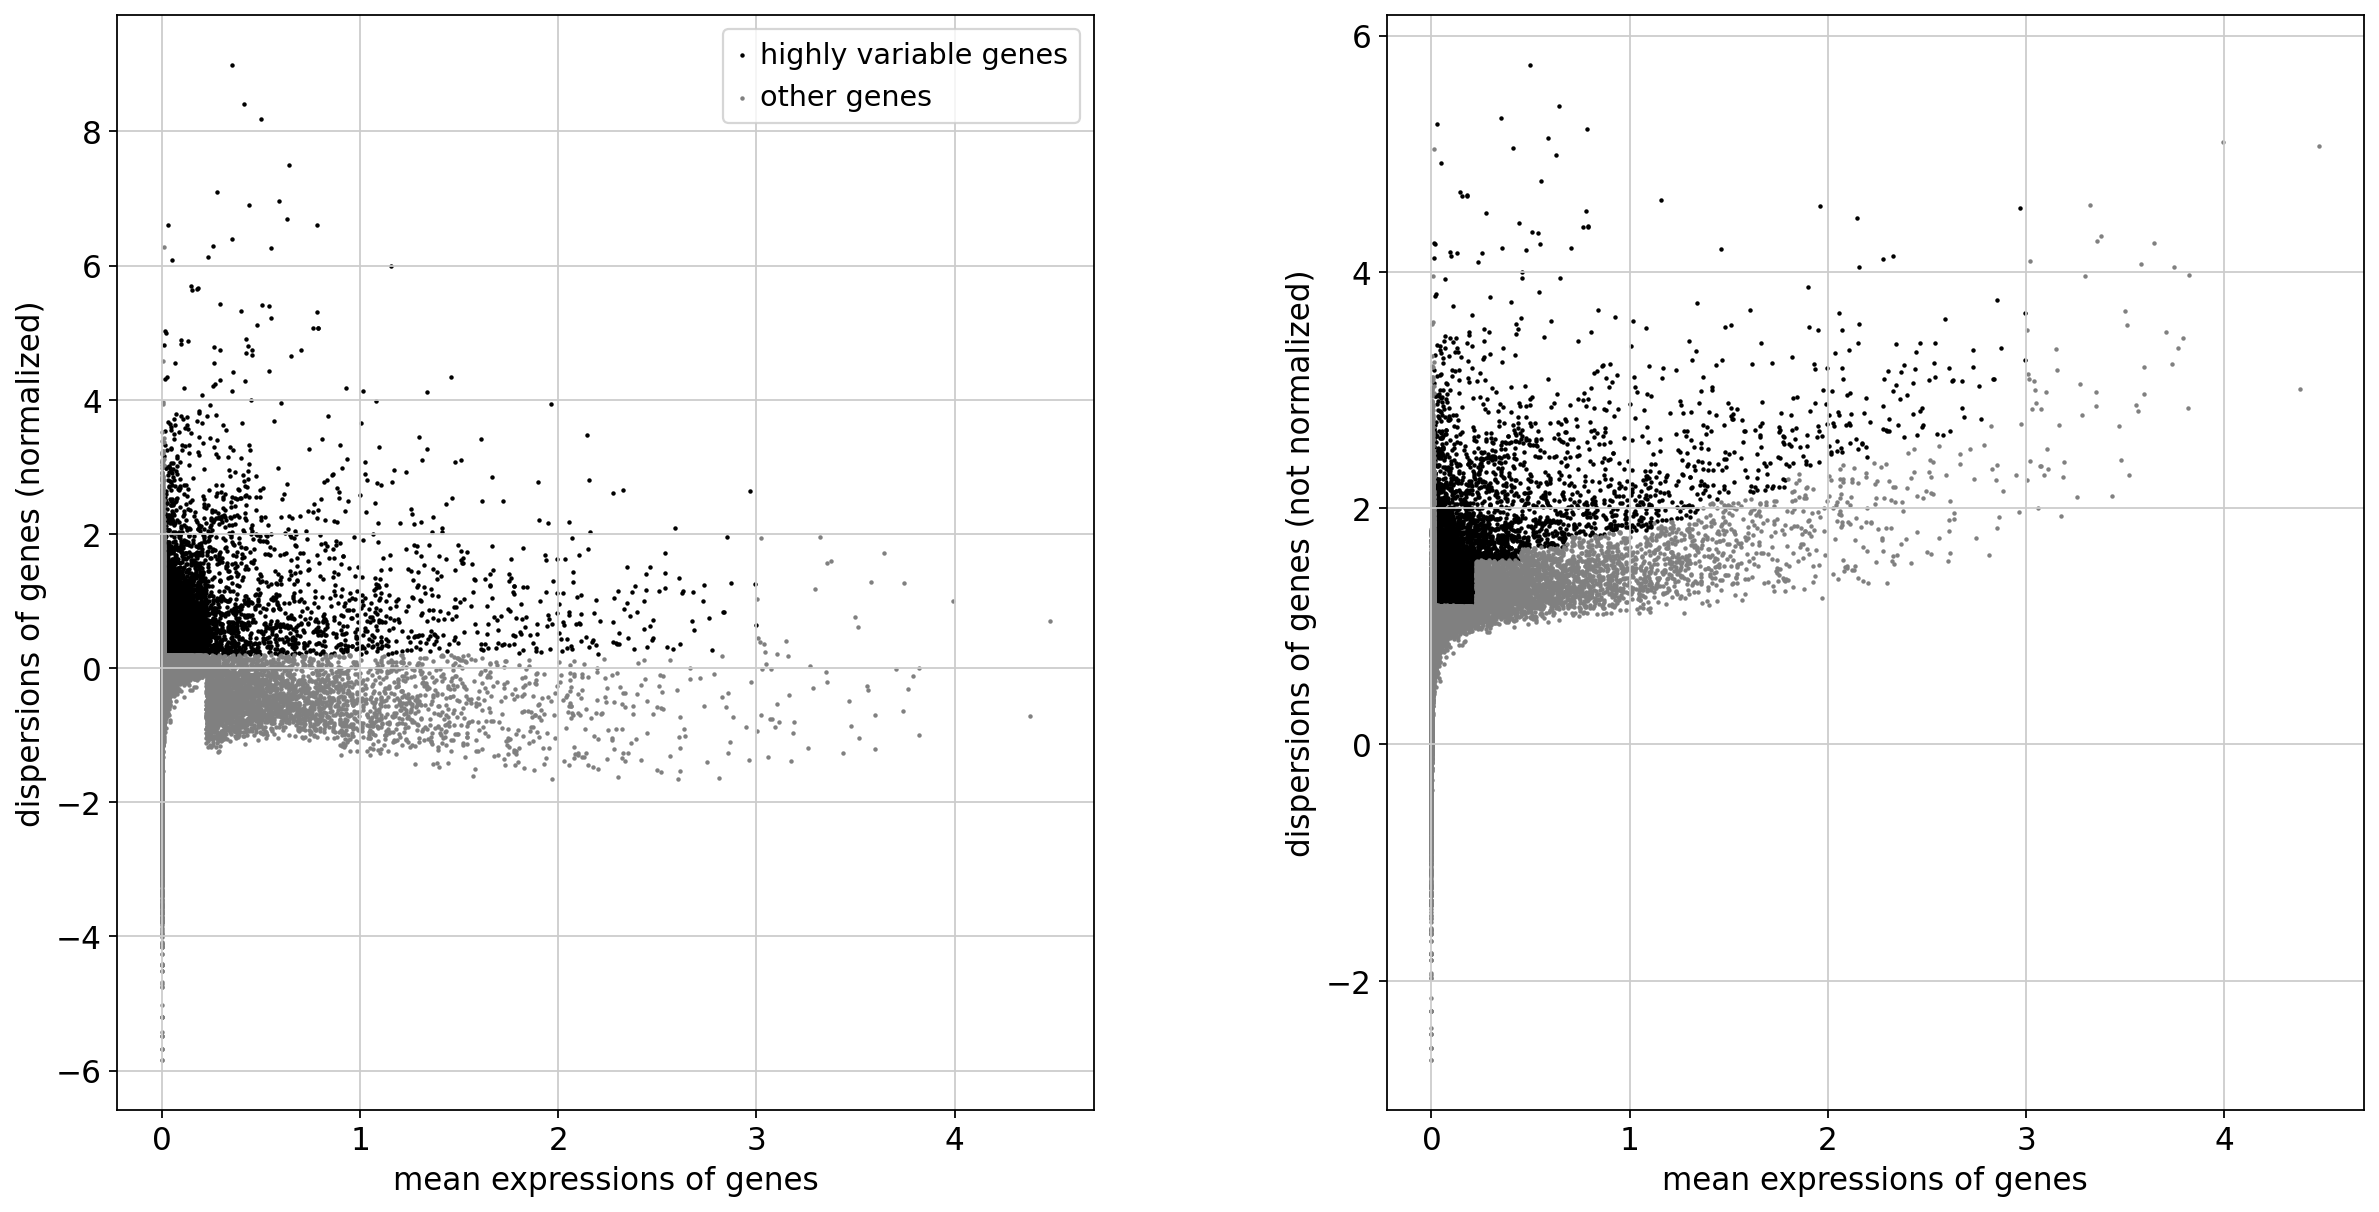

In [38]:
sc.pl.highly_variable_genes(rice_sc_data)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


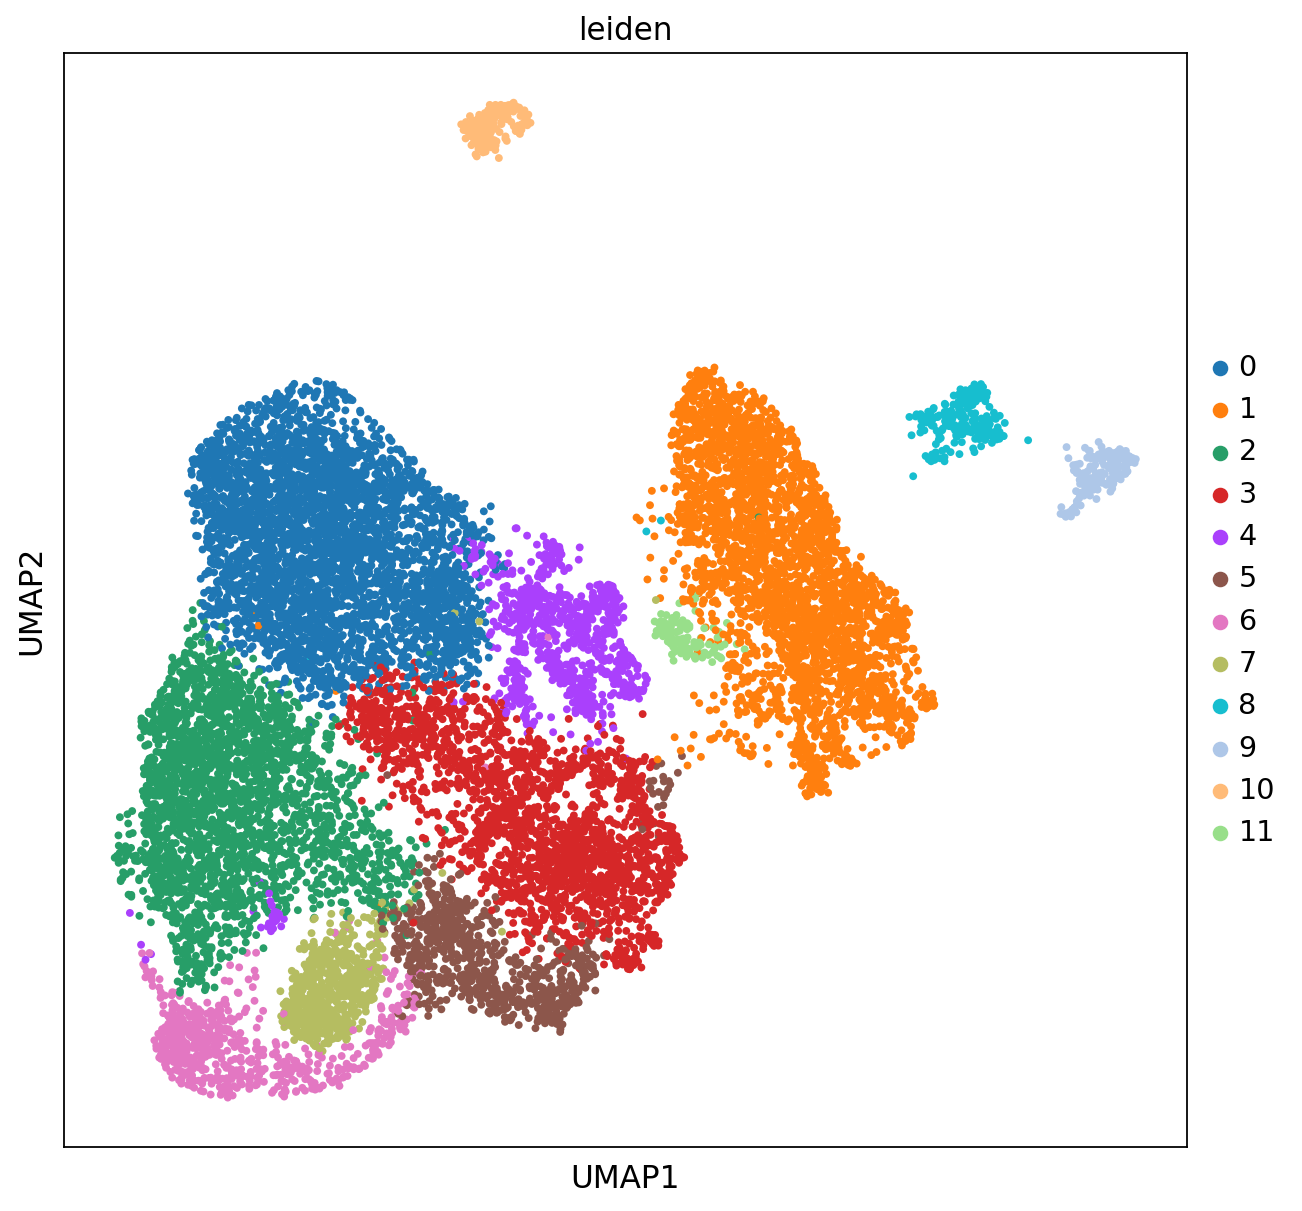

In [39]:
sc.tl.pca(rice_sc_data, svd_solver='arpack', random_state= 3456)
sc.pp.neighbors(rice_sc_data, n_neighbors=30, n_pcs=50, random_state= 112) ##30,50 # 25,45
sc.tl.umap(rice_sc_data, random_state= 649)
sc.tl.leiden(rice_sc_data, random_state= 823, resolution= .5)

sc.pl.umap(rice_sc_data, color = 'leiden', s=50,)

In [40]:
marker_genes = pd.read_csv('/home/passala/git/Coexpressalog_Method_Development/rice_maize_data/marker_genes.csv', sep= '\t')
#marker_genes['Gene ID'] =marker_genes['Gene ID'].str.split('-').str[1]
#marker_genes['Gene ID'] =marker_genes['Gene ID'].str[:5]+'0'+marker_genes['Gene ID'].str[5:]+'0'
marker_genes

Gene ID       P value  avg_log(Foldchange)  \
0     LOC-Os02g44310  0.000000e+00             1.648360   
1     LOC-Os06g13680  0.000000e+00             0.630611   
2     LOC-Os07g34589  0.000000e+00             0.597807   
3     LOC-Os01g21120  0.000000e+00             0.462817   
4     LOC-Os04g33110  0.000000e+00             0.756632   
...              ...           ...                  ...   
6536  LOC-Os05g19600  4.260000e-23             0.312931   
6537  LOC-Os03g26460  1.500000e-21             0.271316   
6538  LOC-Os06g35560  4.780000e-20             0.255126   
6539  LOC-Os01g52010  1.400000e-14             0.294384   
6540  LOC-Os09g26960  1.080000e-13             0.275655   

      pct.1 (enriched cluster)  pct.2 (other clusters)  adjusted P value  \
0                        0.999                   0.977      0.000000e+00   
1                        0.999                   0.998      0.000000e+00   
2                        0.999                   0.993      0.000000e+00   
3                        0.999                   0.991      0.000000e+00   
4                        0.996                   0.985      0.000000e+00   
...                        ...                     ...               ...   
6536                     0.176                   0.102      1.670000e-18   
6537                     0.433                   0.344      5.890000e-17   
6538                     0.600                   0.498      1.870000e-15   
6539                     0.302                   0.243      5.500000e-10   
6540                     0.345                   0.286      4.220000e-09   

     cluster  
0     cortex  
1     cortex  
2     cortex  
3     cortex  
4     cortex  
...      ...  
6536   stele  
6537   stele  
6538   stele  
6539   stele  
6540   stele  

[6541 rows x 7 columns]

In [41]:
gene_convertor_for_rice = pd.read_csv('/data/passala/Collaborator_Data/GEO_sourced_single_cell_for_CRUSH/Rice_japonica/genome_conversion/cleaned_conversion_with_duplicates.csv')


In [42]:
merged_marker_genes = marker_genes.merge(how = 'left', right= gene_convertor_for_rice, left_on= 'Gene ID', right_on= 'MSU Format',)
merged_marker_genes

Gene ID       P value  avg_log(Foldchange)  \
0     LOC-Os02g44310  0.000000e+00             1.648360   
1     LOC-Os06g13680  0.000000e+00             0.630611   
2     LOC-Os07g34589  0.000000e+00             0.597807   
3     LOC-Os01g21120  0.000000e+00             0.462817   
4     LOC-Os04g33110  0.000000e+00             0.756632   
...              ...           ...                  ...   
6612  LOC-Os05g19600  4.260000e-23             0.312931   
6613  LOC-Os03g26460  1.500000e-21             0.271316   
6614  LOC-Os06g35560  4.780000e-20             0.255126   
6615  LOC-Os01g52010  1.400000e-14             0.294384   
6616  LOC-Os09g26960  1.080000e-13             0.275655   

      pct.1 (enriched cluster)  pct.2 (other clusters)  adjusted P value  \
0                        0.999                   0.977      0.000000e+00   
1                        0.999                   0.998      0.000000e+00   
2                        0.999                   0.993      0.000000e+00   
3                        0.999                   0.991      0.000000e+00   
4                        0.996                   0.985      0.000000e+00   
...                        ...                     ...               ...   
6612                     0.176                   0.102      1.670000e-18   
6613                     0.433                   0.344      5.890000e-17   
6614                     0.600                   0.498      1.870000e-15   
6615                     0.302                   0.243      5.500000e-10   
6616                     0.345                   0.286      4.220000e-09   

     cluster    RAP Format      MSU Format  
0     cortex  Os02g0662000  LOC-Os02g44310  
1     cortex  Os06g0246000  LOC-Os06g13680  
2     cortex  Os07g0529800  LOC-Os07g34589  
3     cortex  Os01g0313300  LOC-Os01g21120  
4     cortex  Os04g0403900  LOC-Os04g33110  
...      ...           ...             ...  
6612   stele  Os05g0277000  LOC-Os05g19600  
6613   stele  Os03g0381300  LOC-Os03g26460  
6614   stele  Os06g0548200  LOC-Os06g35560  
6615   stele  Os01g0717700  LOC-Os01g52010  
6616   stele  Os09g0441400  LOC-Os09g26960  

[6617 rows x 9 columns]

In [43]:
rice_sc_data.var_names_make_unique()

In [44]:
merged_marker_genes.loc[merged_marker_genes['Gene ID'].isin(['LOC-Os05g39960'])]

Gene ID        P value  avg_log(Foldchange)  \
920  LOC-Os05g39960  8.070000e-256             2.804204   

     pct.1 (enriched cluster)  pct.2 (other clusters)  adjusted P value  \
920                       1.0                   0.306     3.160000e-251   

        cluster    RAP Format      MSU Format  
920  endodermis  Os05g0477300  LOC-Os05g39960

In [45]:
merged_marker_genes.loc[merged_marker_genes['RAP Format'].isin(rice_sc_data.var.index)].loc[merged_marker_genes['cluster']=='stele'].head(20)

Gene ID  P value  avg_log(Foldchange)  pct.1 (enriched cluster)  \
5981  LOC-Os01g18170      0.0             1.302331                     1.000   
5982  LOC-Os07g03279      0.0             0.787610                     1.000   
5983  LOC-Os01g25560      0.0             0.664794                     0.999   
5984  LOC-Os04g56100      0.0             0.624333                     0.998   
5985  LOC-Os04g47220      0.0             0.674268                     0.997   
5986  LOC-Os10g30790      0.0             0.590438                     0.996   
5987  LOC-Os11g42960      0.0             1.612527                     0.994   
5988  LOC-Os03g13140      0.0             0.911512                     0.992   
5989  LOC-Os10g28050      0.0             0.713794                     0.992   
5990  LOC-Os03g51080      0.0             0.492899                     0.992   
5991  LOC-Os01g03340      0.0             0.844496                     0.991   
5992  LOC-Os03g09900      0.0             0.593086                     0.991   
5993  LOC-Os06g46799      0.0             2.747570                     0.987   
5994  LOC-Os08g06100      0.0             0.525474                     0.985   
5995  LOC-Os07g07790      0.0             2.805350                     0.983   
5996  LOC-Os01g15830      0.0             2.742166                     0.982   
5997  LOC-Os02g33080      0.0             0.642733                     0.980   
5998  LOC-Os01g18744      0.0             0.680905                     0.978   
5999  LOC-Os10g28200      0.0             0.819171                     0.970   
6000  LOC-Os02g40840      0.0             0.729416                     0.965   

      pct.2 (other clusters)  adjusted P value cluster    RAP Format  \
5981                   0.966               0.0   stele  Os01g0284500   
5982                   0.996               0.0   stele  Os07g0124900   
5983                   0.966               0.0   stele  Os01g0358100   
5984                   0.974               0.0   stele  Os04g0655100   
5985                   0.968               0.0   stele  Os04g0559700   
5986                   0.911               0.0   stele  Os10g0444700   
5987                   0.430               0.0   stele  Os11g0649600   
5988                   0.827               0.0   stele  Os03g0233900   
5989                   0.779               0.0   stele  Os10g0416100   
5990                   0.930               0.0   stele  Os03g0720300   
5991                   0.854               0.0   stele  Os01g0124200   
5992                   0.891               0.0   stele  Os03g0194900   
5993                   0.426               0.0   stele  Os06g0681600   
5994                   0.801               0.0   stele  Os08g0157500   
5995                   0.160               0.0   stele  Os07g0174400   
5996                   0.413               0.0   stele  Os01g0263300   
5997                   0.894               0.0   stele  Os02g0533900   
5998                   0.600               0.0   stele  Os01g0291500   
5999                   0.820               0.0   stele  Os10g0417600   
6000                   0.753               0.0   stele  Os02g0621800   

          MSU Format  
5981  LOC-Os01g18170  
5982  LOC-Os07g03279  
5983  LOC-Os01g25560  
5984  LOC-Os04g56100  
5985  LOC-Os04g47220  
5986  LOC-Os10g30790  
5987  LOC-Os11g42960  
5988  LOC-Os03g13140  
5989  LOC-Os10g28050  
5990  LOC-Os03g51080  
5991  LOC-Os01g03340  
5992  LOC-Os03g09900  
5993  LOC-Os06g46799  
5994  LOC-Os08g06100  
5995  LOC-Os07g07790  
5996  LOC-Os01g15830  
5997  LOC-Os02g33080  
5998  LOC-Os01g18744  
5999  LOC-Os10g28200  
6000  LOC-Os02g40840

In [46]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os05g0477300'], s=50, legend_loc = 'on data')# endodermis

In [47]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os03g0223400'], s=50, legend_loc = 'on data')# epi near root hair

In [48]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os05g0246300'], s=50, legend_loc = 'on data')# root cap

In [49]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os07g0104100'], s=50, legend_loc = 'on data')# metaxylem

In [50]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os07g0174900'], s=50, legend_loc = 'on data')# stele

In [51]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os06g0335900'], s=50, legend_loc = 'on data') ## root hair

In [52]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os07g0529800'], s=50, legend_loc = 'on data') # cortex

In [53]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os12g0548401'], s=50, legend_loc = 'on data') # cortex

In [54]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os01g0282800'], s=50, legend_loc = 'on data') ## epidermiks

In [55]:
#sc.pl.umap(rice_sc_data, color = ['leiden','Os01g72340'], s=50, legend_loc = 'on data') # cortex

In [56]:
rice_sc_data.var

gene_ids    feature_types  highly_variable         means  \
Os01g0100100  Os01g0100100  Gene Expression            False  9.381453e-03   
Os01g0100200  Os01g0100200  Gene Expression            False  4.067292e-02   
Os01g0100300  Os01g0100300  Gene Expression            False  4.735694e-04   
Os01g0100400  Os01g0100400  Gene Expression            False  4.003630e-03   
Os01g0100466  Os01g0100466  Gene Expression            False  1.000000e-12   
...                    ...              ...              ...           ...   
Os12g0641200  Os12g0641200  Gene Expression            False  1.339003e-02   
Os12g0641300  Os12g0641300  Gene Expression            False  1.637107e-02   
Os12g0641400  Os12g0641400  Gene Expression             True  4.142963e-01   
Os12g0641500  Os12g0641500  Gene Expression             True  6.777357e-02   
Os12g0641600  Os12g0641600  Gene Expression            False  1.000000e-12   

              dispersions  dispersions_norm  
Os01g0100100     1.401757          0.553759  
Os01g0100200     0.994555         -0.085596  
Os01g0100300     0.386184         -1.040810  
Os01g0100400     0.607636         -0.693104  
Os01g0100466          NaN          0.000000  
...                   ...               ...  
Os12g0641200     0.937923         -0.174515  
Os12g0641300     0.751851         -0.466670  
Os12g0641400     1.574961          0.228052  
Os12g0641500     1.372489          0.507805  
Os12g0641600          NaN          0.000000  

[37863 rows x 6 columns]

In [57]:
rice_sc_data.obs['Cell Cluster Annotation'] = 'Not Annotated'
rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['1','11'])] = 'Stele'
rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['0','3',])] = 'Cortex'
rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['2','5','6'])] = 'Epidermis'
rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['9'])] = 'Root Hair'

types_to_include_in_mapping = ['Epidermis','Cortex','Stele', 'Root Hair']

/tmp/ipykernel_1964571/2794517125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['1','11'])] = 'Stele'
/tmp/ipykernel_1964571/2794517125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rice_sc_data.obs['Cell Cluster Annotation'].loc[rice_sc_data.obs['leiden'].isin(['0','3',])] = 'Cortex'
/tmp/ipykernel_1964571/2794517125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [58]:
sec_rice = rice_sc_data[rice_sc_data.obs.loc[rice_sc_data.obs['Cell Cluster Annotation'].isin(types_to_include_in_mapping)].index,:]
sec_rice

View of AnnData object with n_obs × n_vars = 13077 × 37863
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


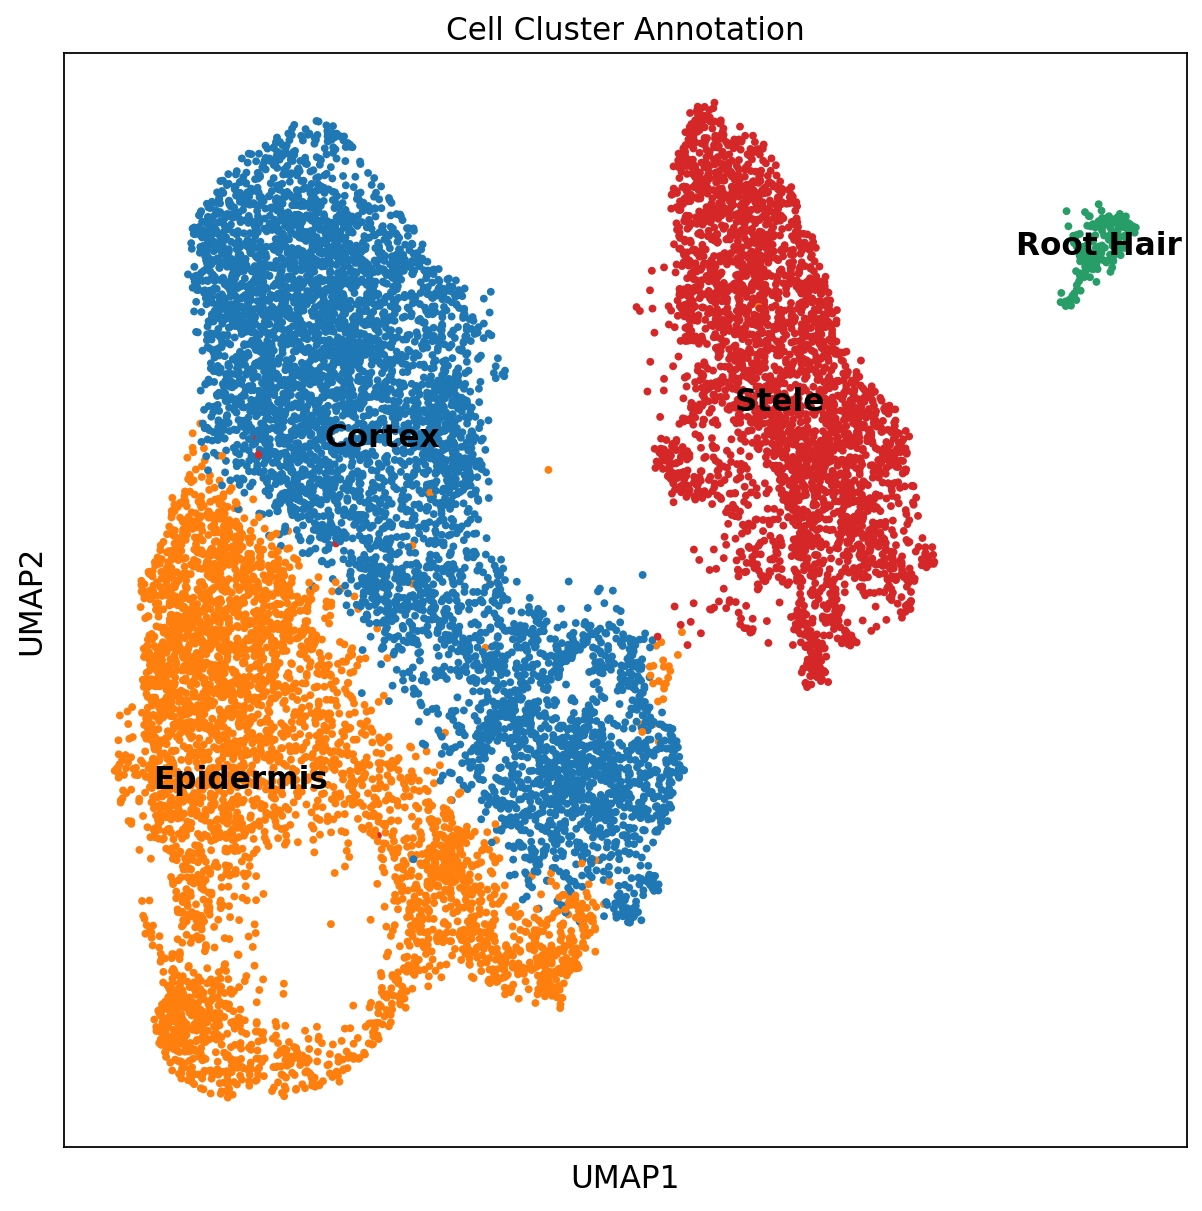

In [59]:
sc.pl.umap(sec_rice, color = ['Cell Cluster Annotation'], s=50, legend_loc = 'on data')

In [60]:
sec_maize = maize_Data[maize_Data.obs.loc[maize_Data.obs['Cell Cluster Annotation'].isin(types_to_include_in_mapping)].index,:]


In [61]:
sec_maize.obs.value_counts(subset = 'Cell Cluster Annotation')

Cell Cluster Annotation
Cortex       1719
Stele         677
Epidermis     329
Root Hair     107
dtype: int64

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


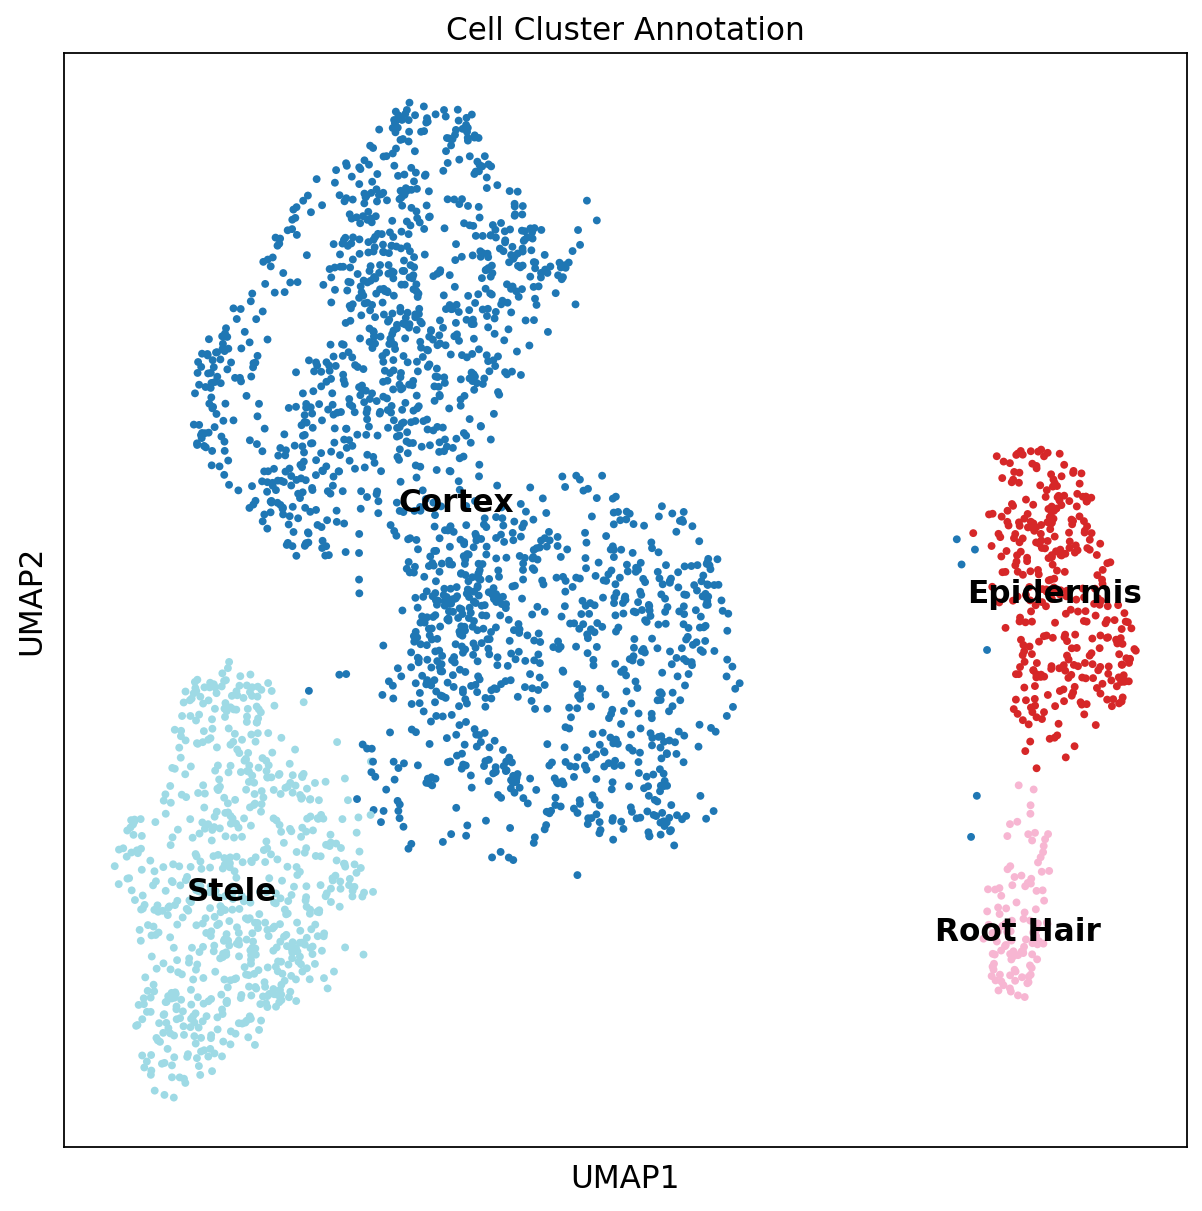

In [62]:
sc.pl.umap(sec_maize, color = ['Cell Cluster Annotation'],palette= 'tab20', s=50, legend_loc = 'on data')

In [63]:
sec_rice.var['Gene Name'] = sec_rice.var.index
sec_rice.var = sec_rice.var.rename(columns = {'Gene Name':'Gene ID'})
sec_rice.var = sec_rice.var.merge(right = co_expressalog_map_85, right_on = 'Rice Gene', how = 'left', left_on= 'Gene ID')
sec_rice.var

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


gene_ids    feature_types  highly_variable         means  \
0      Os01g0100100  Gene Expression            False  9.381453e-03   
1      Os01g0100200  Gene Expression            False  4.067292e-02   
2      Os01g0100300  Gene Expression            False  4.735694e-04   
3      Os01g0100400  Gene Expression            False  4.003630e-03   
4      Os01g0100466  Gene Expression            False  1.000000e-12   
...             ...              ...              ...           ...   
37858  Os12g0641200  Gene Expression            False  1.339003e-02   
37859  Os12g0641300  Gene Expression            False  1.637107e-02   
37860  Os12g0641400  Gene Expression             True  4.142963e-01   
37861  Os12g0641500  Gene Expression             True  6.777357e-02   
37862  Os12g0641600  Gene Expression            False  1.000000e-12   

       dispersions  dispersions_norm       Gene ID Rice Gene Maize Gene  \
0         1.401757          0.553759  Os01g0100100       NaN        NaN   
1         0.994555         -0.085596  Os01g0100200       NaN        NaN   
2         0.386184         -1.040810  Os01g0100300       NaN        NaN   
3         0.607636         -0.693104  Os01g0100400       NaN        NaN   
4              NaN          0.000000  Os01g0100466       NaN        NaN   
...            ...               ...           ...       ...        ...   
37858     0.937923         -0.174515  Os12g0641200       NaN        NaN   
37859     0.751851         -0.466670  Os12g0641300       NaN        NaN   
37860     1.574961          0.228052  Os12g0641400       NaN        NaN   
37861     1.372489          0.507805  Os12g0641500       NaN        NaN   
37862          NaN          0.000000  Os12g0641600       NaN        NaN   

      Coexpressalog  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
37858           NaN  
37859           NaN  
37860           NaN  
37861           NaN  
37862           NaN  

[37863 rows x 10 columns]

In [64]:
sec_rice.var = sec_rice.var.set_index('Gene ID')
sec_rice.var

gene_ids    feature_types  highly_variable         means  \
Gene ID                                                                      
Os01g0100100  Os01g0100100  Gene Expression            False  9.381453e-03   
Os01g0100200  Os01g0100200  Gene Expression            False  4.067292e-02   
Os01g0100300  Os01g0100300  Gene Expression            False  4.735694e-04   
Os01g0100400  Os01g0100400  Gene Expression            False  4.003630e-03   
Os01g0100466  Os01g0100466  Gene Expression            False  1.000000e-12   
...                    ...              ...              ...           ...   
Os12g0641200  Os12g0641200  Gene Expression            False  1.339003e-02   
Os12g0641300  Os12g0641300  Gene Expression            False  1.637107e-02   
Os12g0641400  Os12g0641400  Gene Expression             True  4.142963e-01   
Os12g0641500  Os12g0641500  Gene Expression             True  6.777357e-02   
Os12g0641600  Os12g0641600  Gene Expression            False  1.000000e-12   

              dispersions  dispersions_norm Rice Gene Maize Gene Coexpressalog  
Gene ID                                                                         
Os01g0100100     1.401757          0.553759       NaN        NaN           NaN  
Os01g0100200     0.994555         -0.085596       NaN        NaN           NaN  
Os01g0100300     0.386184         -1.040810       NaN        NaN           NaN  
Os01g0100400     0.607636         -0.693104       NaN        NaN           NaN  
Os01g0100466          NaN          0.000000       NaN        NaN           NaN  
...                   ...               ...       ...        ...           ...  
Os12g0641200     0.937923         -0.174515       NaN        NaN           NaN  
Os12g0641300     0.751851         -0.466670       NaN        NaN           NaN  
Os12g0641400     1.574961          0.228052       NaN        NaN           NaN  
Os12g0641500     1.372489          0.507805       NaN        NaN           NaN  
Os12g0641600          NaN          0.000000       NaN        NaN           NaN  

[37863 rows x 9 columns]

In [65]:
sec_maize.var = sec_maize.var.merge(right = co_expressalog_map_85, how = 'left', right_on= 'Maize Gene', left_on='gene_ids')
sec_maize.var

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


gene_ids    feature_types  In CoCoCoNet  n_cells  \
0       Zm00001d027230  Gene Expression             0       67   
1       Zm00001d027231  Gene Expression             1      290   
2       Zm00001d027233  Gene Expression             1        2   
3       Zm00001d027236  Gene Expression             1       36   
4       Zm00001d027239  Gene Expression             1       60   
...                ...              ...           ...      ...   
25648  ENSRNA049478534  Gene Expression             1       67   
25649  ENSRNA049478548  Gene Expression             0        8   
25650  ENSRNA049478530  Gene Expression             1      217   
25651   Zm00001d000458  Gene Expression             0        2   
25652   Zm00001d000460  Gene Expression             0        4   

       highly_variable     means  dispersions  dispersions_norm Rice Gene  \
0                False  0.024387     1.696221         -0.095275       NaN   
1                 True  0.241811     2.104409          0.435565       NaN   
2                False  0.000593     0.203313         -2.036773       NaN   
3                 True  0.021745     2.032777          0.342410       NaN   
4                False  0.023626     1.419417         -0.455253       NaN   
...                ...       ...          ...               ...       ...   
25648             True  0.090445     2.502171          0.952848       NaN   
25649            False  0.010975     2.160190          0.508108       NaN   
25650             True  0.307557     2.541439          1.507421       NaN   
25651            False  0.000167    -0.994376         -3.594344       NaN   
25652            False  0.001130     0.942761         -1.075135       NaN   

      Maize Gene Coexpressalog  
0            NaN           NaN  
1            NaN           NaN  
2            NaN           NaN  
3            NaN           NaN  
4            NaN           NaN  
...          ...           ...  
25648        NaN           NaN  
25649        NaN           NaN  
25650        NaN           NaN  
25651        NaN           NaN  
25652        NaN           NaN  

[25653 rows x 11 columns]

In [66]:
sec_maize.obs.value_counts(subset = 'Cell Cluster Annotation')

Cell Cluster Annotation
Cortex       1719
Stele         677
Epidermis     329
Root Hair     107
dtype: int64

In [67]:
rice_var_names_with_ortholog = sec_rice.var.dropna().index
rice_version_of_maize_genes_with_ortholog = sec_maize.var.dropna()['Rice Gene'].to_list()

rice_var_names_with_ortholog
overlap_of_shared_genes = rice_var_names_with_ortholog.intersection(rice_version_of_maize_genes_with_ortholog)

maize_genes_to_keep = sec_maize.var.loc[sec_maize.var['Rice Gene'].isin(overlap_of_shared_genes)].index

In [68]:
sec_maize.var = sec_maize.var.set_index('gene_ids')


In [69]:
sec_maize

AnnData object with n_obs × n_vars = 2832 × 25653
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation'
    var: 'feature_types', 'In CoCoCoNet', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Rice Gene', 'Maize Gene', 'Coexpressalog'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Cell Cluster Annotation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [70]:
maize_single_cell_trimmed_to_orthologs = sec_maize[:,maize_genes_to_keep]
maize_single_cell_trimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 2832 × 4142
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation'
    var: 'feature_types', 'In CoCoCoNet', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Rice Gene', 'Maize Gene', 'Coexpressalog'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Cell Cluster Annotation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [71]:
rice_genes_to_keep = sec_rice.var.loc[sec_rice.var['Rice Gene'].isin(overlap_of_shared_genes)].index

In [72]:
rice_genes_to_keep

Index(['Os01g0100600', 'Os01g0101600', 'Os01g0101800', 'Os01g0102500',
       'Os01g0102900', 'Os01g0103600', 'Os01g0103800', 'Os01g0104600',
       'Os01g0104800', 'Os01g0104900',
       ...
       'Os12g0632600', 'Os12g0632700', 'Os12g0633200', 'Os12g0635500',
       'Os12g0636000', 'Os12g0636200', 'Os12g0636800', 'Os12g0637100',
       'Os12g0638600', 'Os12g0640600'],
      dtype='object', name='Gene ID', length=4142)

In [73]:
rice_single_cell_slimmed_to_orthologs = sec_rice[:,rice_genes_to_keep]
rice_single_cell_slimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 13077 × 4142
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Rice Gene', 'Maize Gene', 'Coexpressalog'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Cell Cluster Annotation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [74]:
maize_single_cell_trimmed_to_orthologs.var.index = maize_single_cell_trimmed_to_orthologs.var['Rice Gene'].to_list()
maize_single_cell_trimmed_to_orthologs.var

feature_types  In CoCoCoNet  n_cells  highly_variable  \
Os10g0563000  Gene Expression             1      379             True   
Os10g0561300  Gene Expression             1       34            False   
Os08g0480100  Gene Expression             1     1948            False   
Os03g0105600  Gene Expression             1      102             True   
Os03g0108400  Gene Expression             1      512            False   
...                       ...           ...      ...              ...   
Os06g0646400  Gene Expression             1      157             True   
Os05g0337200  Gene Expression             1       10            False   
Os06g0650600  Gene Expression             1      177             True   
Os06g0650800  Gene Expression             1      166            False   
Os11g0427700  Gene Expression             1      417            False   

                 means  dispersions  dispersions_norm     Rice Gene  \
Os10g0563000  0.369343     2.289217          0.462854  Os10g0563000   
Os10g0561300  0.009267     1.474556         -0.383545  Os10g0561300   
Os08g0480100  1.526261     2.300201         -0.724204  Os08g0480100   
Os03g0105600  0.065927     2.090421          0.417375  Os03g0105600   
Os03g0108400  0.346754     2.136487         -0.169671  Os03g0108400   
...                ...          ...               ...           ...   
Os06g0646400  0.083593     2.026952          0.334835  Os06g0646400   
Os05g0337200  0.011050     2.403927          0.825084  Os05g0337200   
Os06g0650600  0.149739     2.224363          0.591564  Os06g0650600   
Os06g0650800  0.076455     1.847174          0.101037  Os06g0650800   
Os11g0427700  0.276719     1.903106         -1.136212  Os11g0427700   

                  Maize Gene Coexpressalog  
Os10g0563000  Zm00001d027267           Yes  
Os10g0561300  Zm00001d027268           Yes  
Os08g0480100  Zm00001d027293           Yes  
Os03g0105600  Zm00001d027295           Yes  
Os03g0108400  Zm00001d027314           Yes  
...                      ...           ...  
Os06g0646400  Zm00001d000346           Yes  
Os05g0337200  Zm00001d000400           Yes  
Os06g0650600  Zm00001d000428           Yes  
Os06g0650800  Zm00001d000430           Yes  
Os11g0427700  Zm00001d000434           Yes  

[4142 rows x 10 columns]

In [75]:
order_of_vars = rice_single_cell_slimmed_to_orthologs.var.index.to_list()
current_order_maize_vars = maize_single_cell_trimmed_to_orthologs.var_names
panda_version_of_maize_x_data = pd.DataFrame(columns = current_order_maize_vars, data = maize_single_cell_trimmed_to_orthologs.X.todense())
re_ordered_version = panda_version_of_maize_x_data.reindex(columns = order_of_vars)
re_ordered_version = sparse.csr_matrix(re_ordered_version.values)
maize_single_cell_trimmed_to_orthologs.X = re_ordered_version
maize_single_cell_trimmed_to_orthologs.var = maize_single_cell_trimmed_to_orthologs.var.reindex(order_of_vars)

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/scipy/sparse/_index.py:137: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [76]:
rice_single_cell_slimmed_to_orthologs.obs

n_genes leiden Cell Cluster Annotation
AAACCTGAGCTTTGGT-1-Rice     2149      0                  Cortex
AAACCTGAGGCTACGA-1-Rice     2569      0                  Cortex
AAACCTGAGTAGTGCG-1-Rice     2981      1                   Stele
AAACCTGAGTGTACGG-1-Rice      677      6               Epidermis
AAACCTGCAACTTGAC-1-Rice     2821      1                   Stele
...                          ...    ...                     ...
TTTGTCATCAAACCAC-1-Rice     1002      6               Epidermis
TTTGTCATCATTGCCC-1-Rice      462      3                  Cortex
TTTGTCATCCCTTGTG-1-Rice     1467      0                  Cortex
TTTGTCATCGGTCCGA-1-Rice     3710      1                   Stele
TTTGTCATCTATCCCG-1-Rice     1897      1                   Stele

[13077 rows x 3 columns]

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


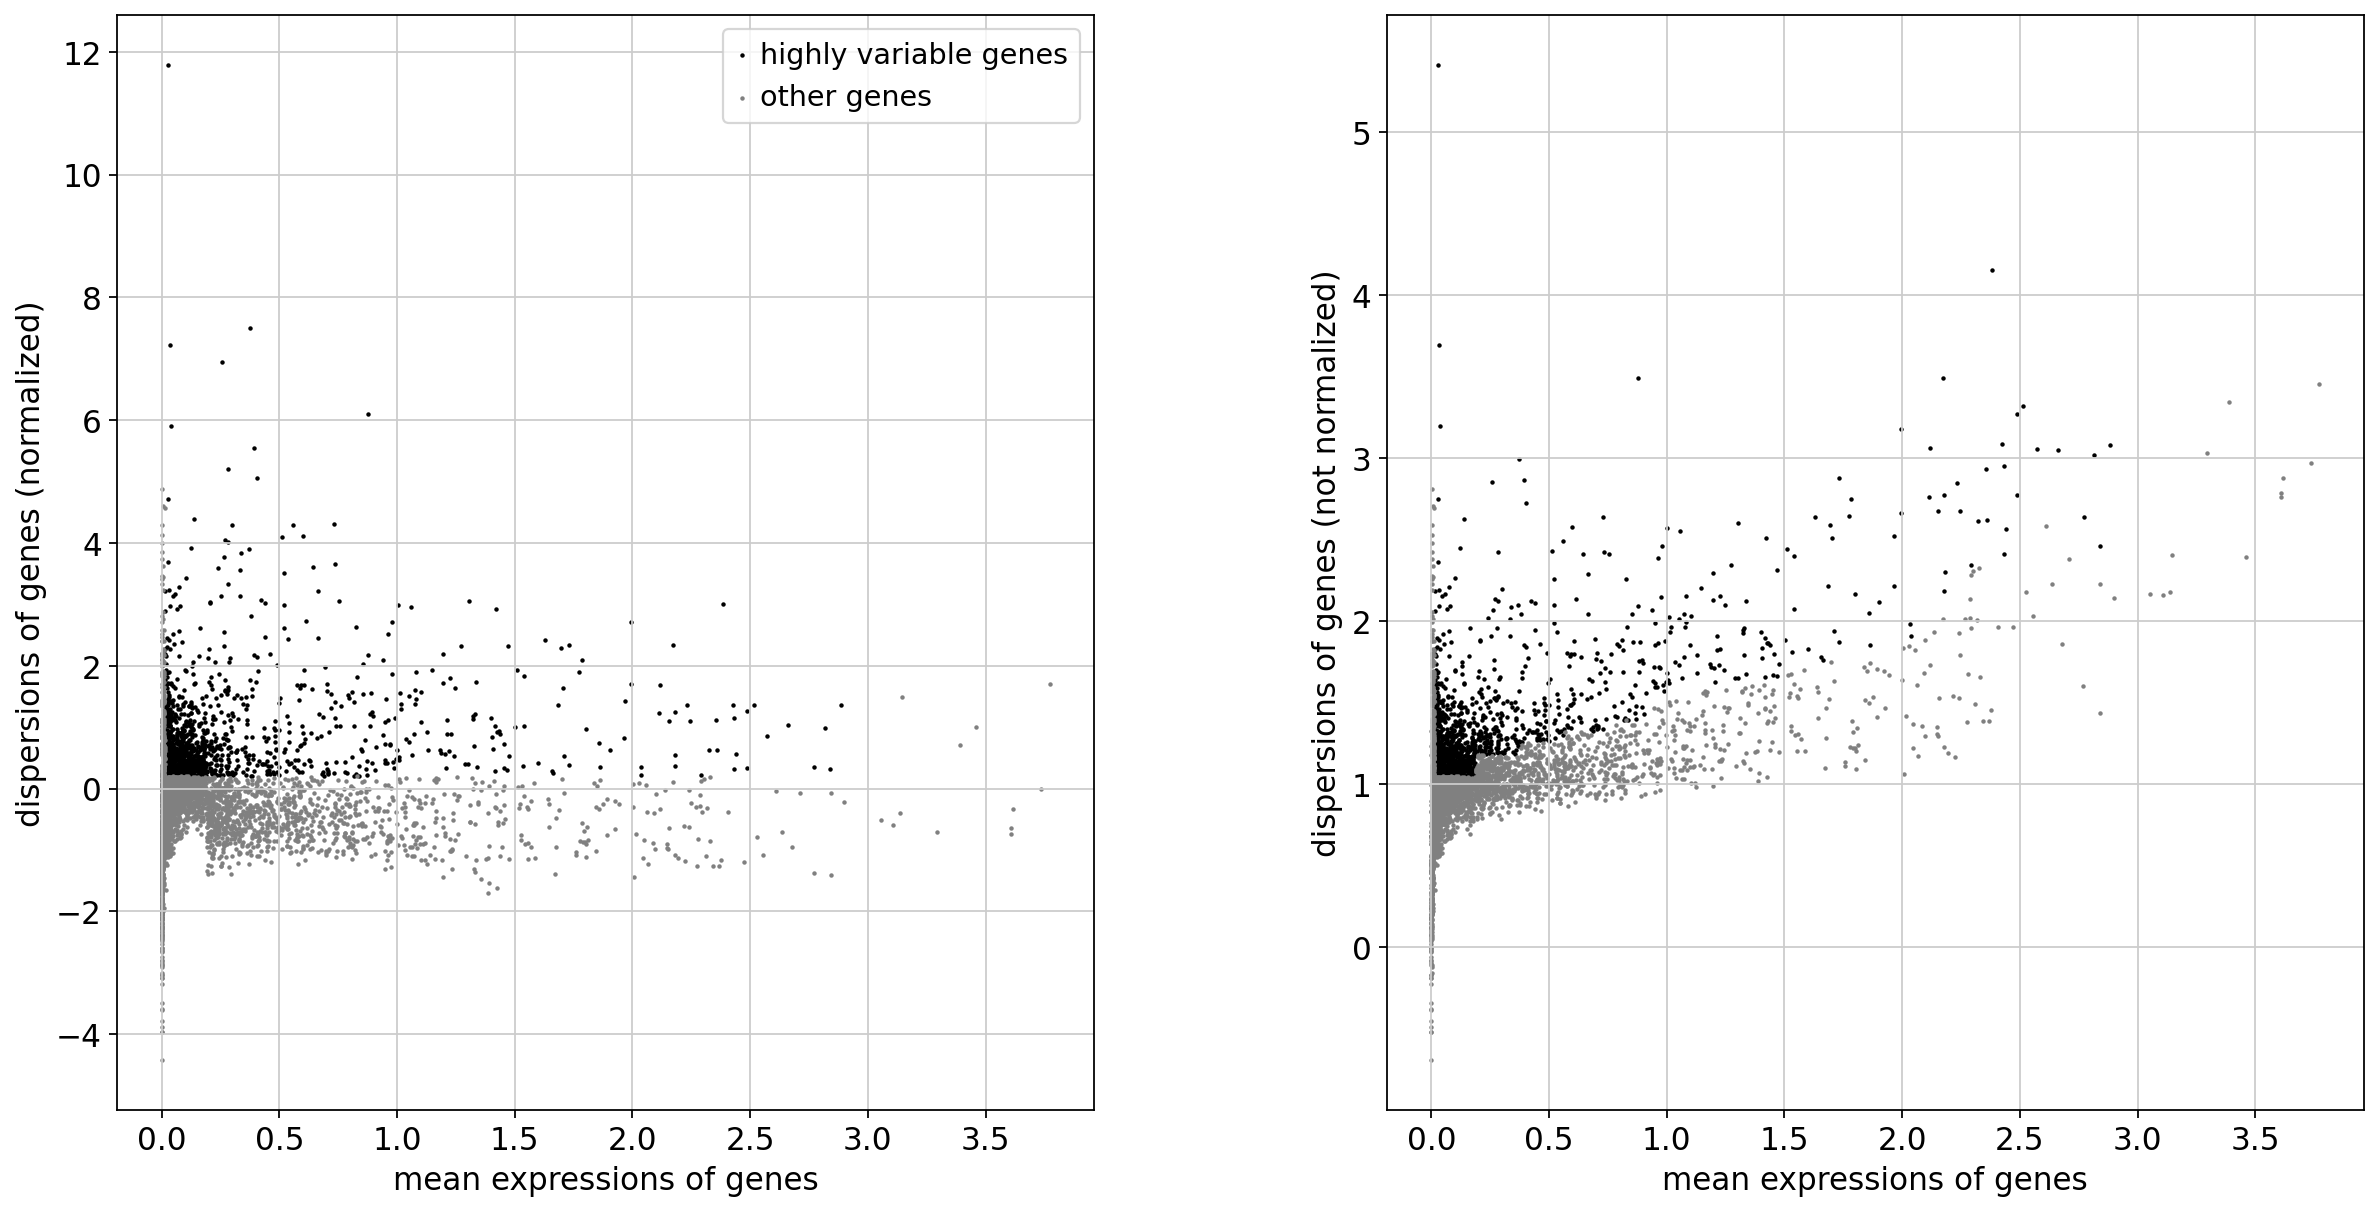

In [77]:
sc.pp.highly_variable_genes(rice_single_cell_slimmed_to_orthologs, min_mean=0.0125, max_mean=3, min_disp=.2)
sc.pl.highly_variable_genes(rice_single_cell_slimmed_to_orthologs)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


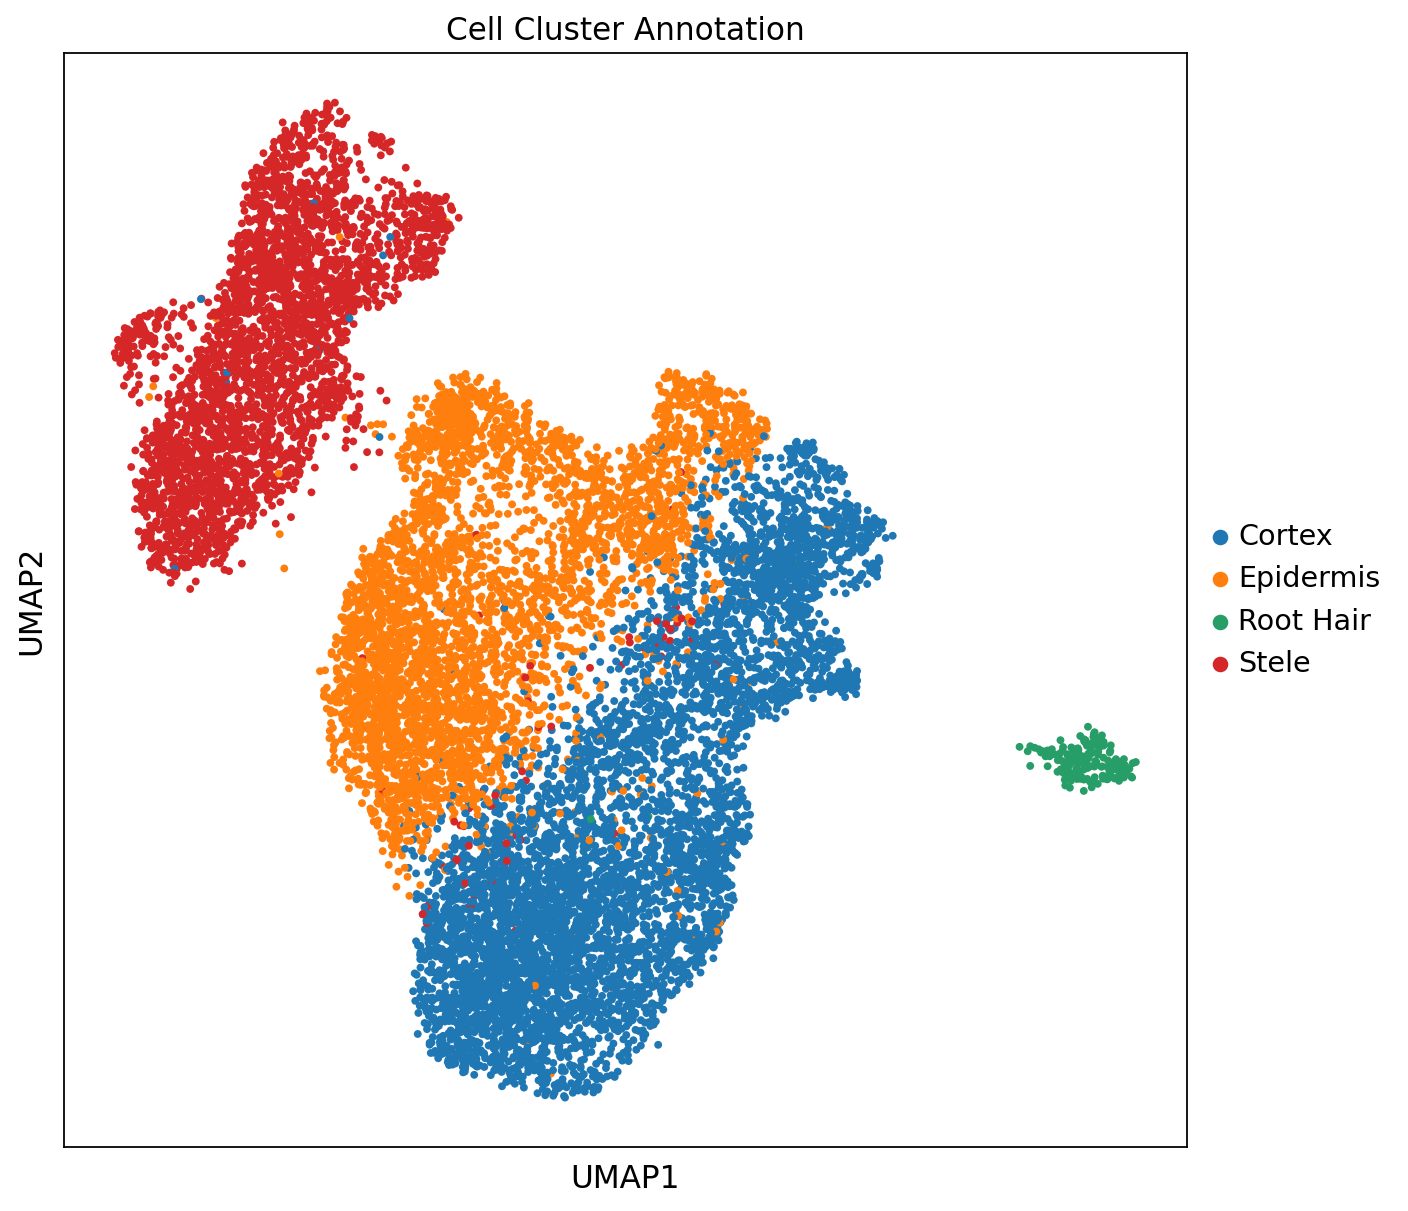

In [78]:
sc.tl.pca(rice_single_cell_slimmed_to_orthologs, svd_solver='arpack', random_state= 5463)
sc.pp.neighbors(rice_single_cell_slimmed_to_orthologs, n_neighbors=30, n_pcs=50, random_state= 2) ##30,50 # 25,45
sc.tl.umap(rice_single_cell_slimmed_to_orthologs, random_state= 897)
sc.tl.leiden(rice_single_cell_slimmed_to_orthologs, random_state= 345,)

sc.pl.umap(rice_single_cell_slimmed_to_orthologs, color = 'Cell Cluster Annotation', s=50,)

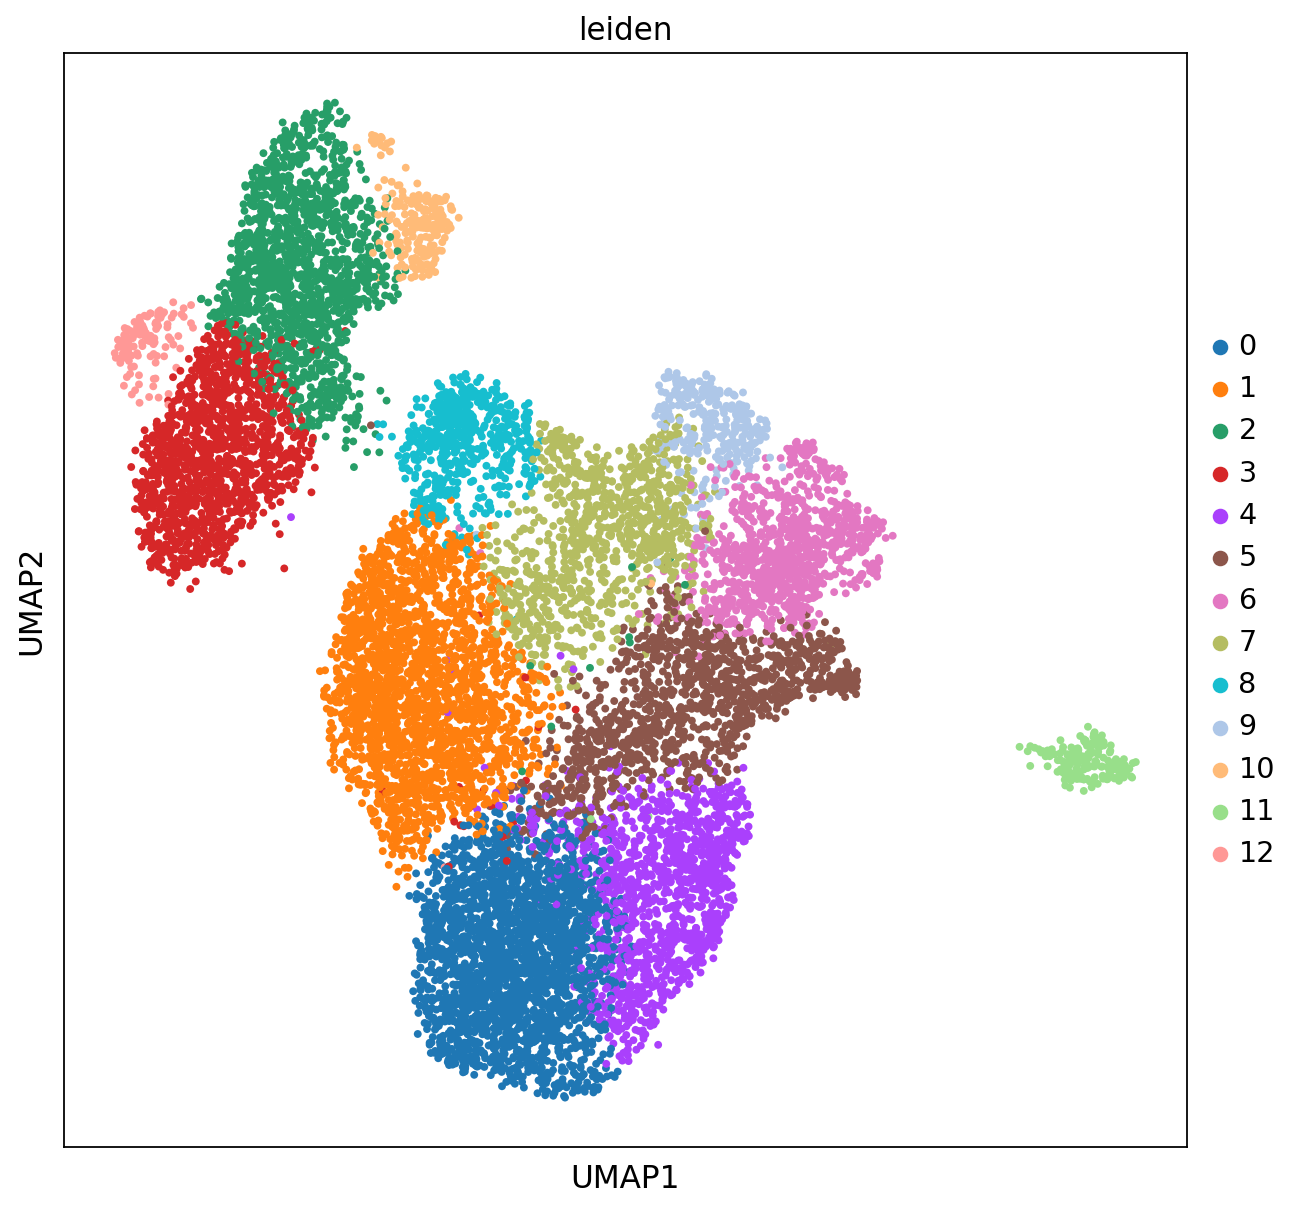

In [79]:
sc.pl.umap(rice_single_cell_slimmed_to_orthologs, color = 'leiden', s=50,)
rice_single_cell_slimmed_to_orthologs.obs['Cluster Before Gene Trimming'] =rice_single_cell_slimmed_to_orthologs.obs['leiden']

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


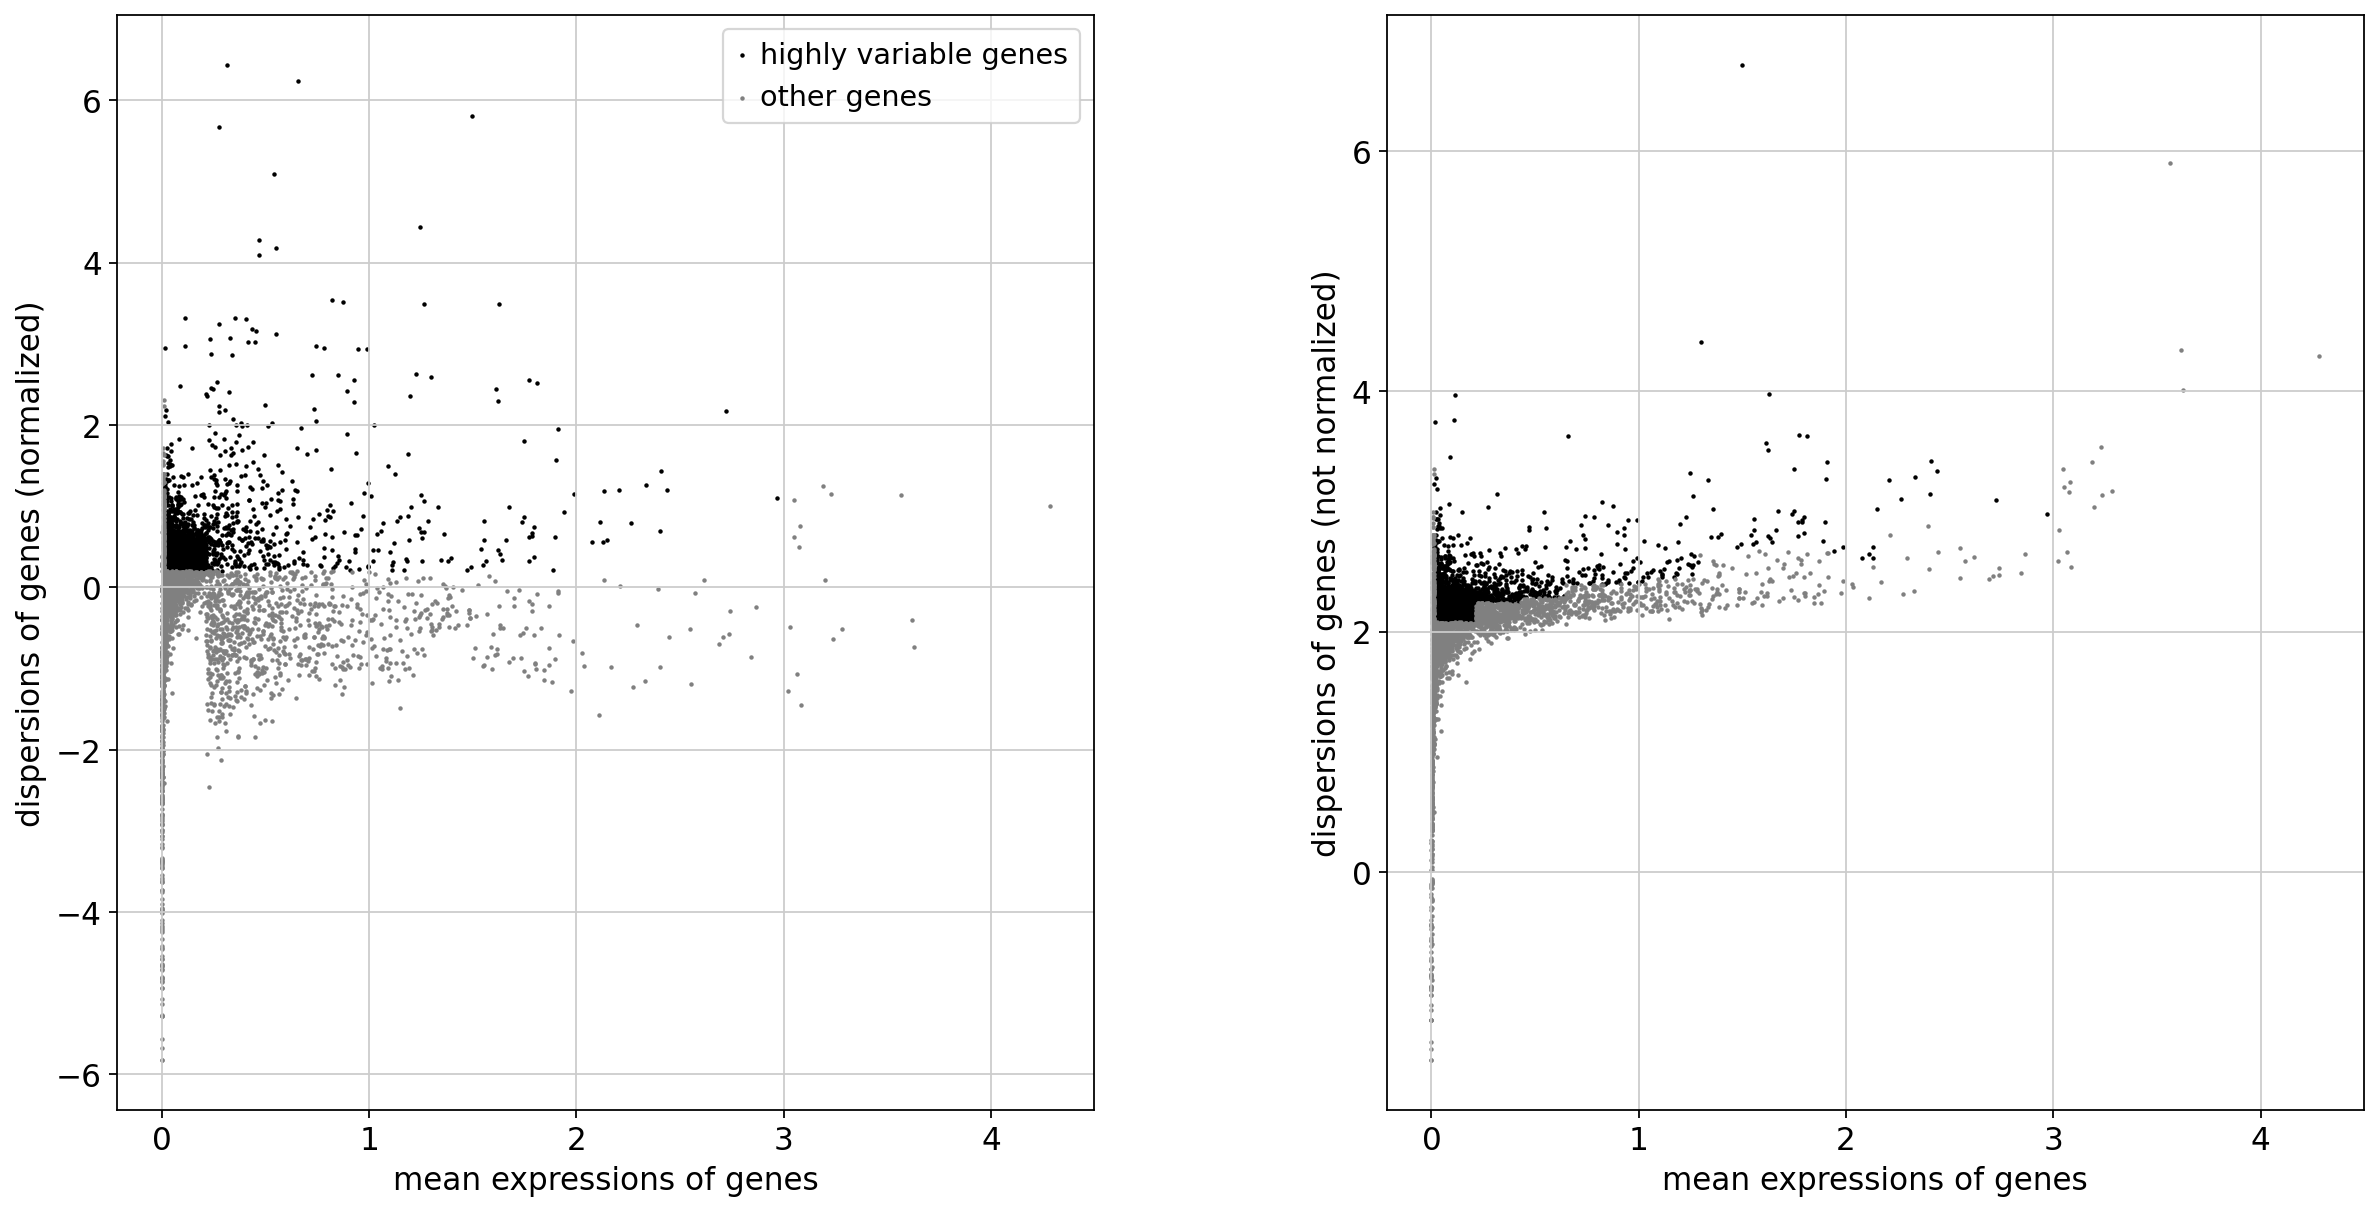

In [80]:
sc.pp.highly_variable_genes(maize_single_cell_trimmed_to_orthologs, min_mean=0.0125, max_mean=3, min_disp=.2)
sc.pl.highly_variable_genes(maize_single_cell_trimmed_to_orthologs)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


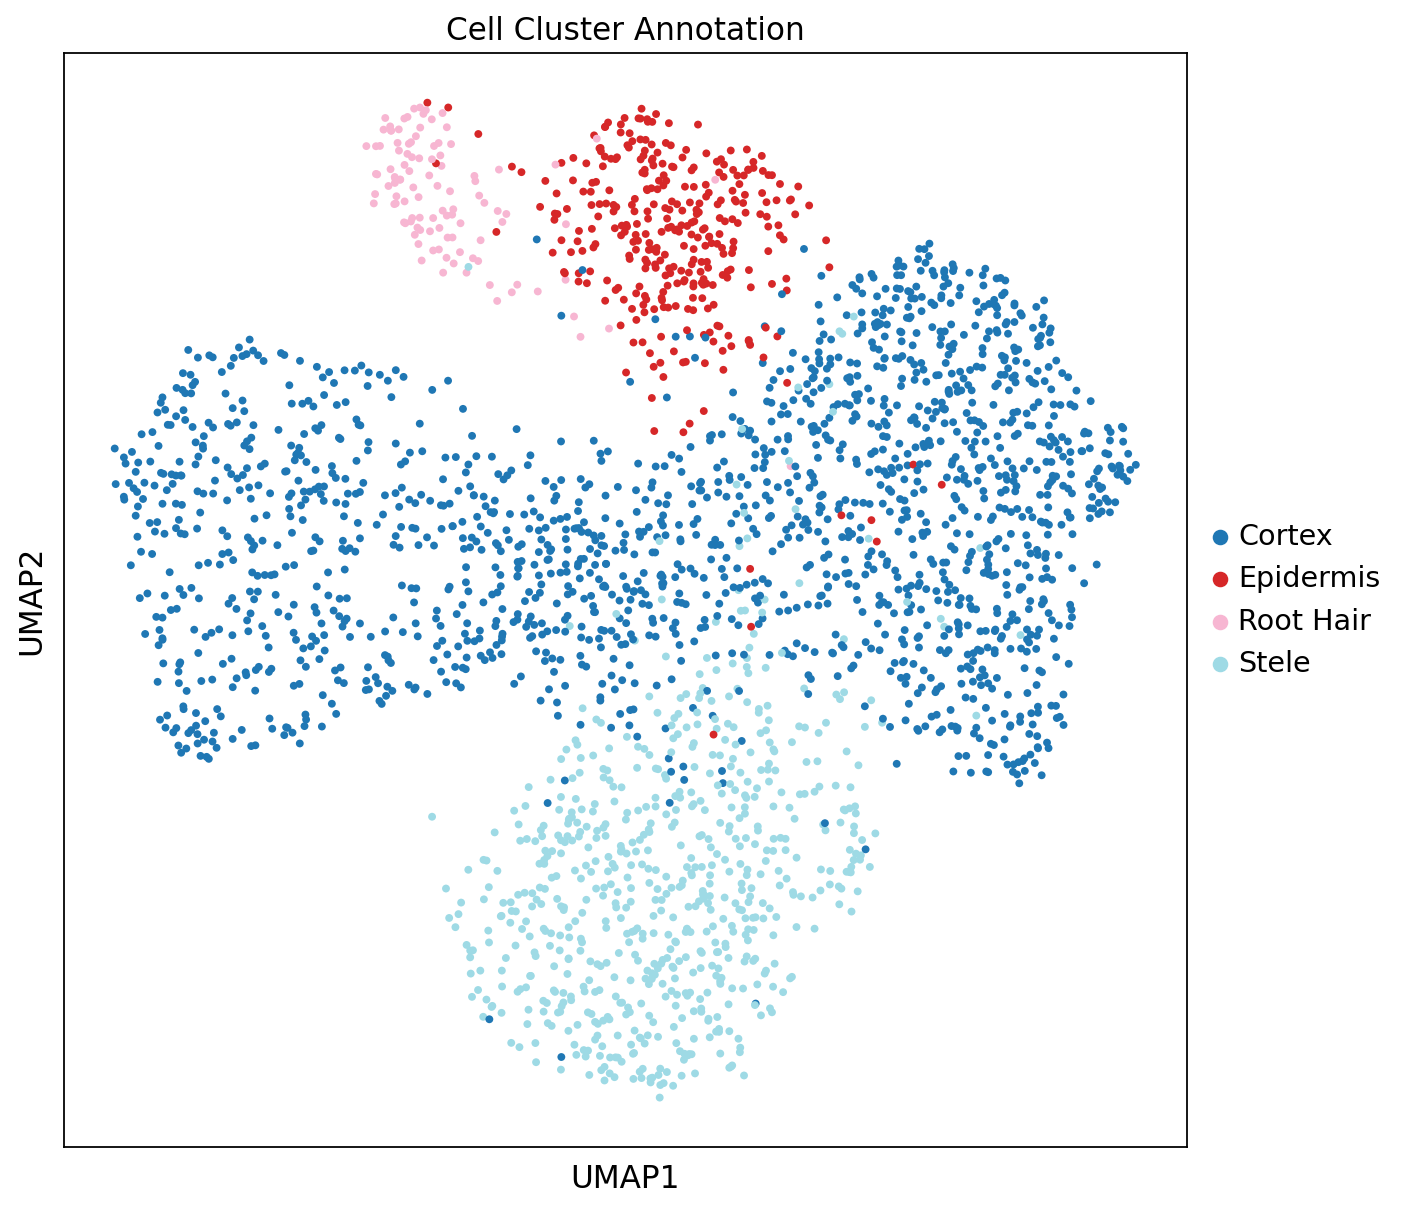

In [81]:
sc.tl.pca(maize_single_cell_trimmed_to_orthologs, svd_solver='arpack', random_state= 2435)
sc.pp.neighbors(maize_single_cell_trimmed_to_orthologs, n_neighbors=30, n_pcs=50, random_state= 68) ##30,50 # 25,45
sc.tl.umap(maize_single_cell_trimmed_to_orthologs, random_state= 253)
sc.tl.leiden(maize_single_cell_trimmed_to_orthologs, random_state= 456,)

sc.pl.umap(maize_single_cell_trimmed_to_orthologs, color = 'Cell Cluster Annotation', s=50,)

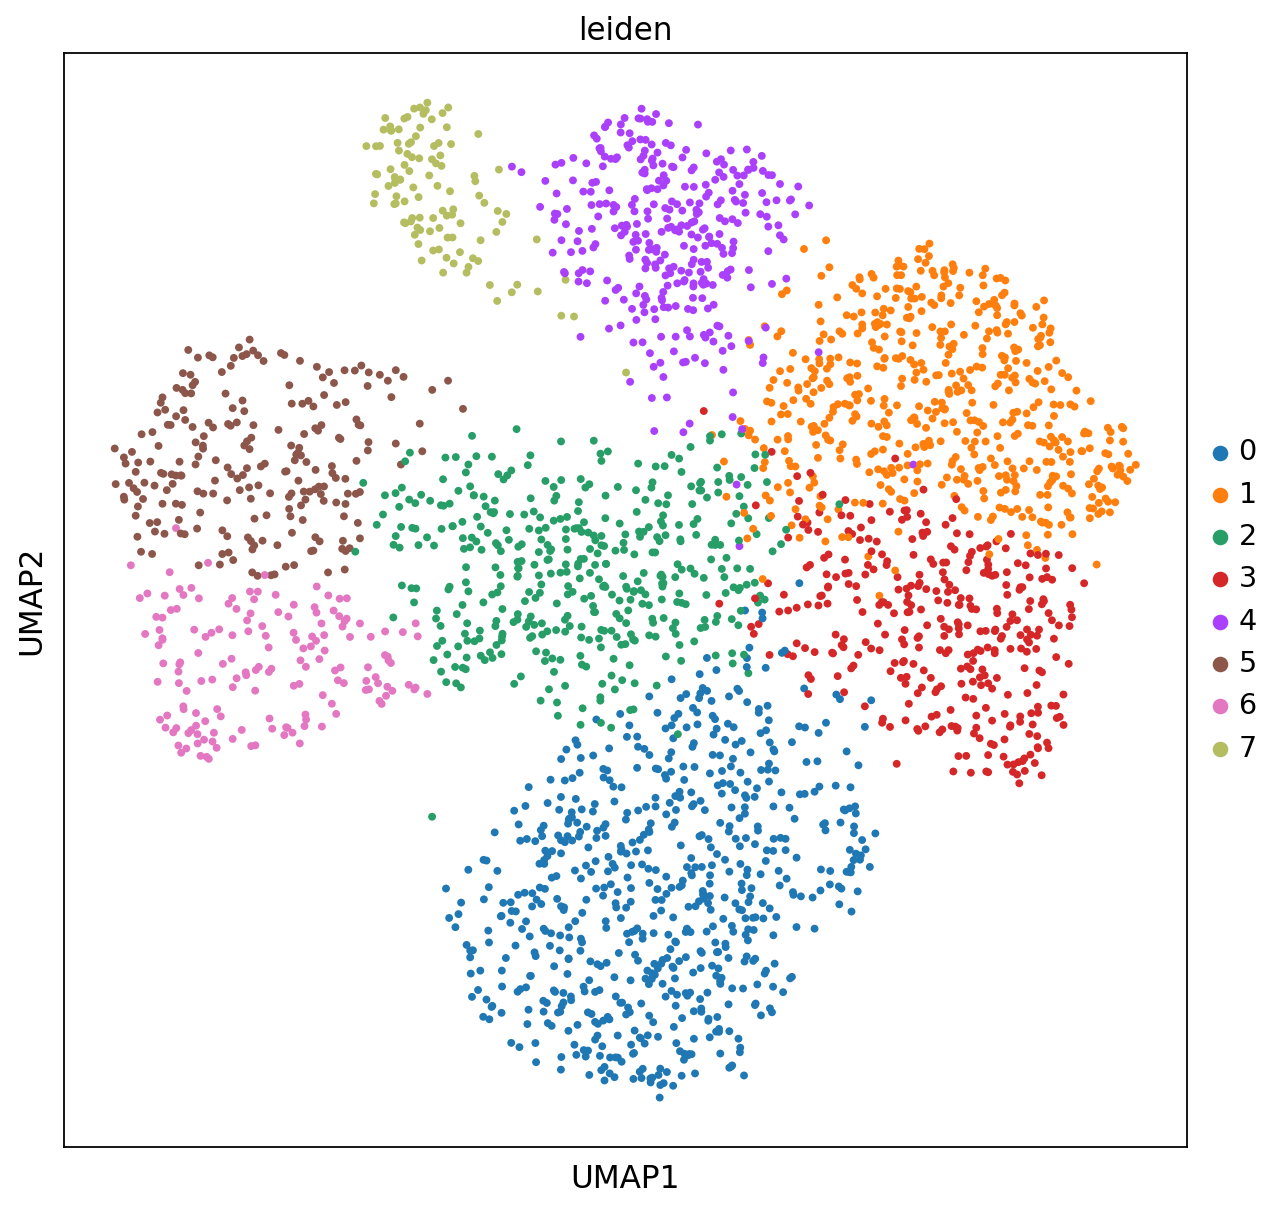

In [82]:
sc.pl.umap(maize_single_cell_trimmed_to_orthologs, color = 'leiden', s=50,)
maize_single_cell_trimmed_to_orthologs.obs['Cluster Before Gene Trimming'] =maize_single_cell_trimmed_to_orthologs.obs['leiden']

In [83]:
maize_single_cell_trimmed_to_orthologs

AnnData object with n_obs × n_vars = 2832 × 4142
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming'
    var: 'feature_types', 'In CoCoCoNet', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Rice Gene', 'Maize Gene', 'Coexpressalog'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Cell Cluster Annotation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [84]:
ultra_trimmed_rice = sc.pp.subsample(rice_single_cell_slimmed_to_orthologs, n_obs = 3500, random_state = 121, copy = True)
ultra_trimmed_rice

AnnData object with n_obs × n_vars = 3500 × 4142
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Rice Gene', 'Maize Gene', 'Coexpressalog'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Cell Cluster Annotation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [85]:
concatendated_rice_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(ultra_trimmed_rice, batch_key = 'Species', batch_categories = ['Maize','Rice'])
concatendated_rice_maize_dataset.var.index.rename('Gene', inplace = True)
concatendated_rice_maize_dataset.obs.index.rename('CellID', inplace = True)

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [86]:
#concatendated_rice_maize_dataset.write_loom('/data/passala/Generated_Tables/Temp_junk/slimmed_concatenated_rice_maize_genes_aligned_with_only_coexpressalogs.loom')

In [87]:
concatendated_rice_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(rice_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Rice'])


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [88]:

# concatendated_rice_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(rice_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Rice'])
# #sc.tl.pca(concatendated_rice_maize_dataset, svd_solver='arpack', )

# sc.external.pp.harmony_integrate(concatendated_rice_maize_dataset,'Species')
# sc.pp.neighbors(concatendated_rice_maize_dataset, n_neighbors = 10, n_pcs = 40, use_rep= 'X_pca_harmony', random_state = 2204)
# sc.tl.umap(concatendated_rice_maize_dataset, random_state= 243)
# sc.pl.umap(concatendated_rice_maize_dataset, color= ['Species', 'Cell Cluster Annotation'], s = 40,)

In [89]:
# import scanorama
# concatendated_rice_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(rice_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Rice'])
# #sc.tl.pca(concatendated_rice_maize_dataset, svd_solver='arpack', )

# sc.external.pp.scanorama_integrate(concatendated_rice_maize_dataset,'Species')
# sc.pp.neighbors(concatendated_rice_maize_dataset, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', random_state = 2204)
# sc.tl.umap(concatendated_rice_maize_dataset, random_state= 243)
# sc.pl.umap(concatendated_rice_maize_dataset, color= ['Species', 'Cell Cluster Annotation'], s = 40,)

In [90]:
# maize_cells = concatendated_rice_maize_dataset.obs.loc[concatendated_rice_maize_dataset.obs['Species'] == 'Maize'].index
# rice_cells = concatendated_rice_maize_dataset.obs.loc[concatendated_rice_maize_dataset.obs['Species'] == 'Rice'].index


In [91]:
# sc.pl.umap(concatendated_rice_maize_dataset[maize_cells,:], color= ['Species', 'Cell Cluster Annotation'], s = 40,)
# sc.pl.umap(concatendated_rice_maize_dataset[rice_cells,:], color= ['Species', 'Cell Cluster Annotation'], s = 40)


In [92]:
# concatendated_rice_maize_dataset[maize_cells,:].obs

In [93]:
#sc.pl.umap(concatendated_rice_maize_dataset, color= ['Species', 'Cell Cluster Annotation'],palette = 'Set1', s = 60,)

In [94]:
#sc.pl.umap(concatendated_rice_maize_dataset, color= ['Species', 'leiden'], s = 40,)

In [95]:
# concatendated_rice_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(rice_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Rice'])


In [96]:
import pymn


In [97]:
# pymn.variableGenes(concatendated_rice_maize_dataset,study_col = 'Species')
# pymn.MetaNeighborUS(concatendated_rice_maize_dataset,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
# g = pymn.plotMetaNeighborUS(concatendated_rice_maize_dataset,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
# #g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_proj')

In [98]:
# pymn.variableGenes(concatendated_rice_maize_dataset,study_col = 'Species')
# pymn.MetaNeighborUS(concatendated_rice_maize_dataset,study_col = 'Species',ct_col = 'Cluster Before Gene Trimming')
# g = pymn.plotMetaNeighborUS(concatendated_rice_maize_dataset,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
# #g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_proj')

In [99]:
# concatendated_rice_maize_dataset.obs['Combined_Pre_trimming_clusters'] = concatendated_rice_maize_dataset.obs['Cluster Before Gene Trimming']

# concatendated_rice_maize_dataset.obs['Combined_Pre_trimming_clusters'].loc[(concatendated_rice_maize_dataset.obs['Cluster Before Gene Trimming'].isin(['1','14',]))&(concatendated_rice_maize_dataset.obs['Species'] == 'Rice')] = '1+14'
# concatendated_rice_maize_dataset.obs['Combined_Pre_trimming_clusters'].loc[(concatendated_rice_maize_dataset.obs['Cluster Before Gene Trimming'].isin(['6','9','8']))&(concatendated_rice_maize_dataset.obs['Species'] == 'Rice')] = '6+9+8'
# concatendated_rice_maize_dataset.obs['Combined_Pre_trimming_clusters'].loc[(concatendated_rice_maize_dataset.obs['Cluster Before Gene Trimming'].isin(['2','12',]))&(concatendated_rice_maize_dataset.obs['Species'] == 'Rice')] = '2+12'
# concatendated_rice_maize_dataset.obs['Combined_Pre_trimming_clusters'].loc[(concatendated_rice_maize_dataset.obs['Cluster Before Gene Trimming'].isin(['4','7',]))&(concatendated_rice_maize_dataset.obs['Species'] == 'Rice')] = '4+7'
# concatendated_rice_maize_dataset.obs['Combined_Pre_trimming_clusters'].loc[(concatendated_rice_maize_dataset.obs['Cluster Before Gene Trimming'].isin(['10','5',]))&(concatendated_rice_maize_dataset.obs['Species'] == 'Rice')] = '10+5'


# concatendated_rice_maize_dataset.obs['Combined_Pre_trimming_clusters'].loc[(concatendated_rice_maize_dataset.obs['Cluster Before Gene Trimming'].isin(['5','6',]))&(concatendated_rice_maize_dataset.obs['Species'] == 'Maize')] = '6+5'
# concatendated_rice_maize_dataset.obs['Combined_Pre_trimming_clusters'].loc[(concatendated_rice_maize_dataset.obs['Cluster Before Gene Trimming'].isin(['3','8',]))&(concatendated_rice_maize_dataset.obs['Species'] == 'Maize')] = '3+8'


In [100]:
# pymn.variableGenes(concatendated_rice_maize_dataset,study_col = 'Species')
# pymn.MetaNeighborUS(concatendated_rice_maize_dataset,study_col = 'Species',ct_col = 'Combined_Pre_trimming_clusters')
# g = pymn.plotMetaNeighborUS(concatendated_rice_maize_dataset,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
# #g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_proj')

In [101]:
# concatendated_rice_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(rice_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Rice'])


In [102]:
# sc.pp.highly_variable_genes(concatendated_rice_maize_dataset, min_mean=0.0125, max_mean=3, min_disp=0.3, batch_key = 'Species')


In [103]:
# var_select = concatendated_rice_maize_dataset.var.highly_variable_nbatches > 1
# var_genes = var_select.index[var_select]

In [104]:
# batches = concatendated_rice_maize_dataset.obs['Species'].cat.categories.tolist()
# alldata = {}
# for batch in batches:
#     alldata[batch] = concatendated_rice_maize_dataset[concatendated_rice_maize_dataset.obs['Species'] == batch,]

# alldata 

In [105]:
# concatendated_rice_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(rice_single_cell_slimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Maize','Rice'])


In [106]:
# cdata = sc.external.pp.mnn_correct(alldata['Maize'],alldata['Rice'],
#                                    svd_dim = 50, batch_key = 'sample', save_raw = True, var_subset = var_genes)

In [107]:
# corr_data = cdata[0]

In [108]:
# sc.pp.highly_variable_genes(corr_data, min_mean=0.0025, max_mean=3, min_disp=0.3)
# sc.pl.highly_variable_genes(corr_data)

In [109]:
# sc.tl.pca(corr_data, svd_solver='arpack', random_state= 243)
# sc.pp.neighbors(corr_data, n_neighbors=30, n_pcs=50, random_state= 647) ##30,50 # 25,45
# sc.tl.umap(corr_data, random_state= 2)
# sc.tl.leiden(corr_data, random_state= 423,)

# sc.pl.umap(corr_data, color = 'Cell Cluster Annotation', s=50,)

In [110]:
# pymn.variableGenes(corr_data,study_col = 'Species')
# pymn.MetaNeighborUS(corr_data,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
# g = pymn.plotMetaNeighborUS(corr_data,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)
# #g.savefig('/home/passala/Gene_duplication_project/Code/Bruno_maize_sorghum_proj')

In [111]:
# concatendated_rice_maize_dataset.obs

In [112]:
import scgen

Global seed set to 0
/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [113]:
concatendated_rice_maize_dataset = maize_single_cell_trimmed_to_orthologs.concatenate(ultra_trimmed_rice, batch_key = 'Species', batch_categories = ['Maize','Rice'])


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [114]:
scgen.SCGEN.setup_anndata(concatendated_rice_maize_dataset, batch_key="Species", labels_key="Cell Cluster Annotation")


In [115]:
model = scgen.SCGEN(concatendated_rice_maize_dataset)

In [116]:
model.train(
    max_epochs=100,
    batch_size=32,
    early_stopping=True,
    early_stopping_patience=25,
)

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=100 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/100:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 29/100:  29%|██▉       | 29/100 [02:08<05:14,  4.43s/it, loss=290, v_num=1]
Monitored metric elbo_validation did not improve in the last 25 records. Best score: 1417.779. Signaling Trainer to stop.


In [ ]:
model.save('/data/passala/Coexpressolog_paper_data/Models/only_coexpressalog_postv11')

In [117]:
corrected_adata = model.batch_removal()
corrected_adata

INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 6332 × 4142
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming', 'Species', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'latent', 'corrected_latent'

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


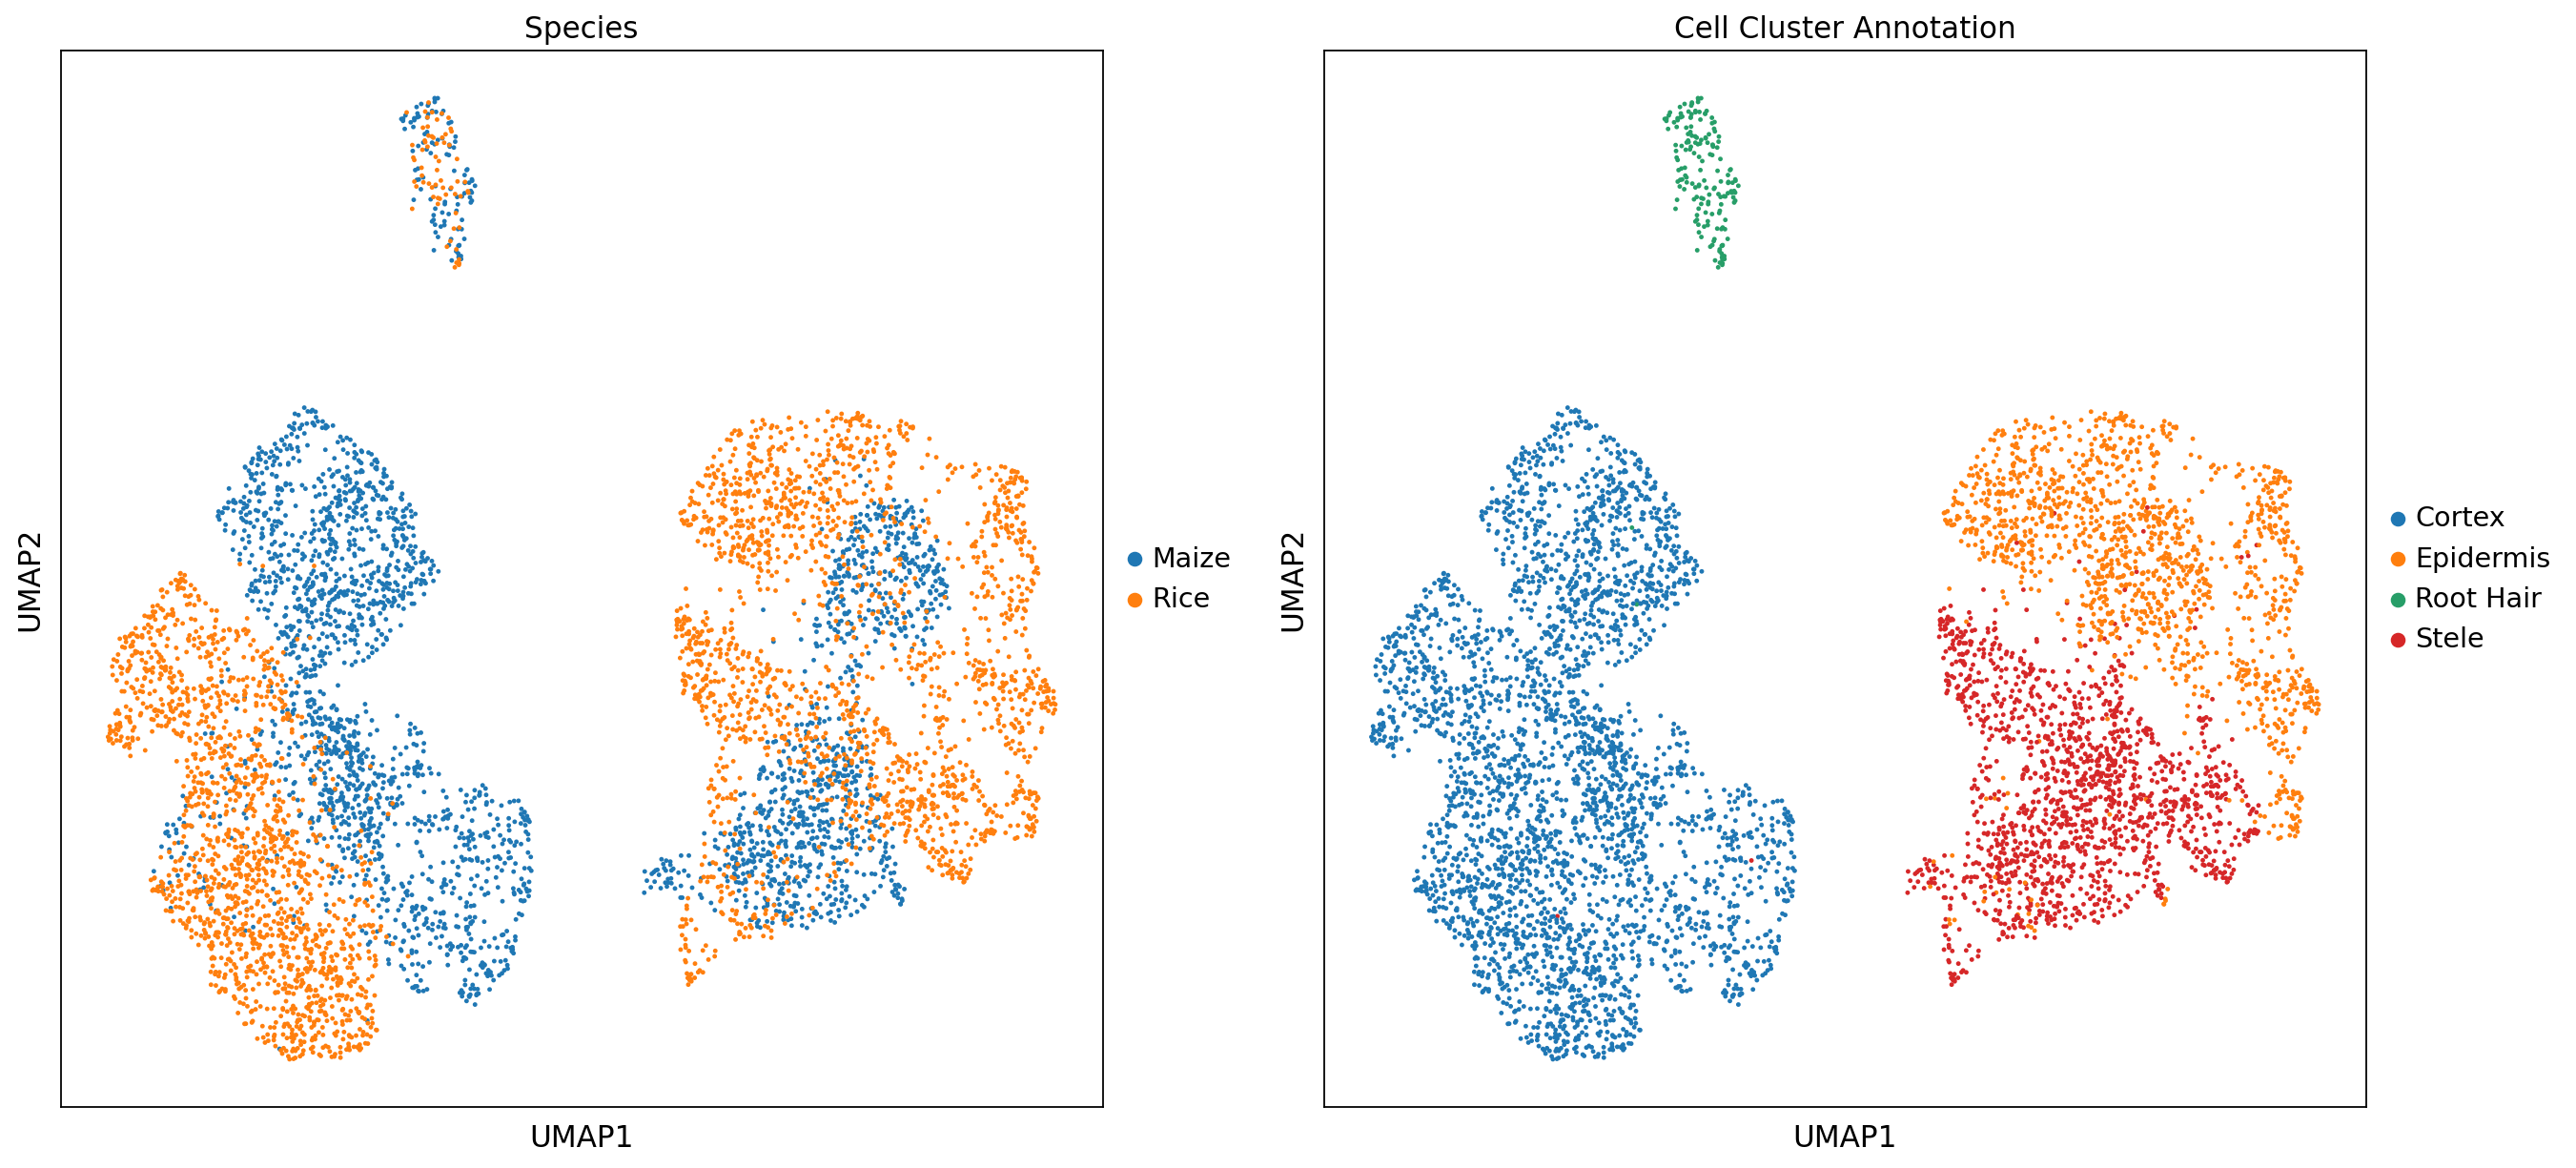

In [118]:
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, color=['Species', 'Cell Cluster Annotation'])

In [119]:
sc.tl.leiden(corrected_adata, resolution = .5)

running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [120]:
real_clusters = corrected_adata.obs['leiden'].value_counts()[corrected_adata.obs['leiden'].value_counts() > 15].index.to_list()

In [121]:
trimmed_alpha_beta = corrected_adata[corrected_adata.obs['leiden'].isin(real_clusters),:]
trimmed_alpha_beta

View of AnnData object with n_obs × n_vars = 6332 × 4142
    obs: 'n_genes', 'leiden', 'Cell Cluster Annotation', 'Cluster Before Gene Trimming', 'Species', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'Species_colors', 'Cell Cluster Annotation_colors', 'leiden'
    obsm: 'latent', 'corrected_latent', 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [122]:
number_cells_in_cluster_with_majority_one_cell_type = 0
number_cells_in_cluster_with_multiple_Cell_types = 0
number_cells_in_mixed_dataset = 0
number_cells_in_single_dataset = 0
for leiden_cluster in real_clusters:
    current_cell_group = trimmed_alpha_beta.obs.loc[trimmed_alpha_beta.obs['leiden'] == leiden_cluster]
    if current_cell_group['Cell Cluster Annotation'].value_counts(normalize = True).max() > .6:
        number_cells_in_cluster_with_majority_one_cell_type+= len(current_cell_group)
    else:
        number_cells_in_cluster_with_multiple_Cell_types += len(current_cell_group)
    if current_cell_group['Species'].value_counts(normalize = True).max() < .7:
        number_cells_in_mixed_dataset += len(current_cell_group)
    else: 
        number_cells_in_single_dataset+= len(current_cell_group)

In [123]:
total_cells = len(trimmed_alpha_beta.obs)
percent_cells_in_majority_one_cell_type = number_cells_in_cluster_with_majority_one_cell_type/total_cells
print(percent_cells_in_majority_one_cell_type)

1.0


In [124]:
percent_cells_in_mixed = number_cells_in_mixed_dataset/total_cells
print(percent_cells_in_mixed)

0.18161718256475048


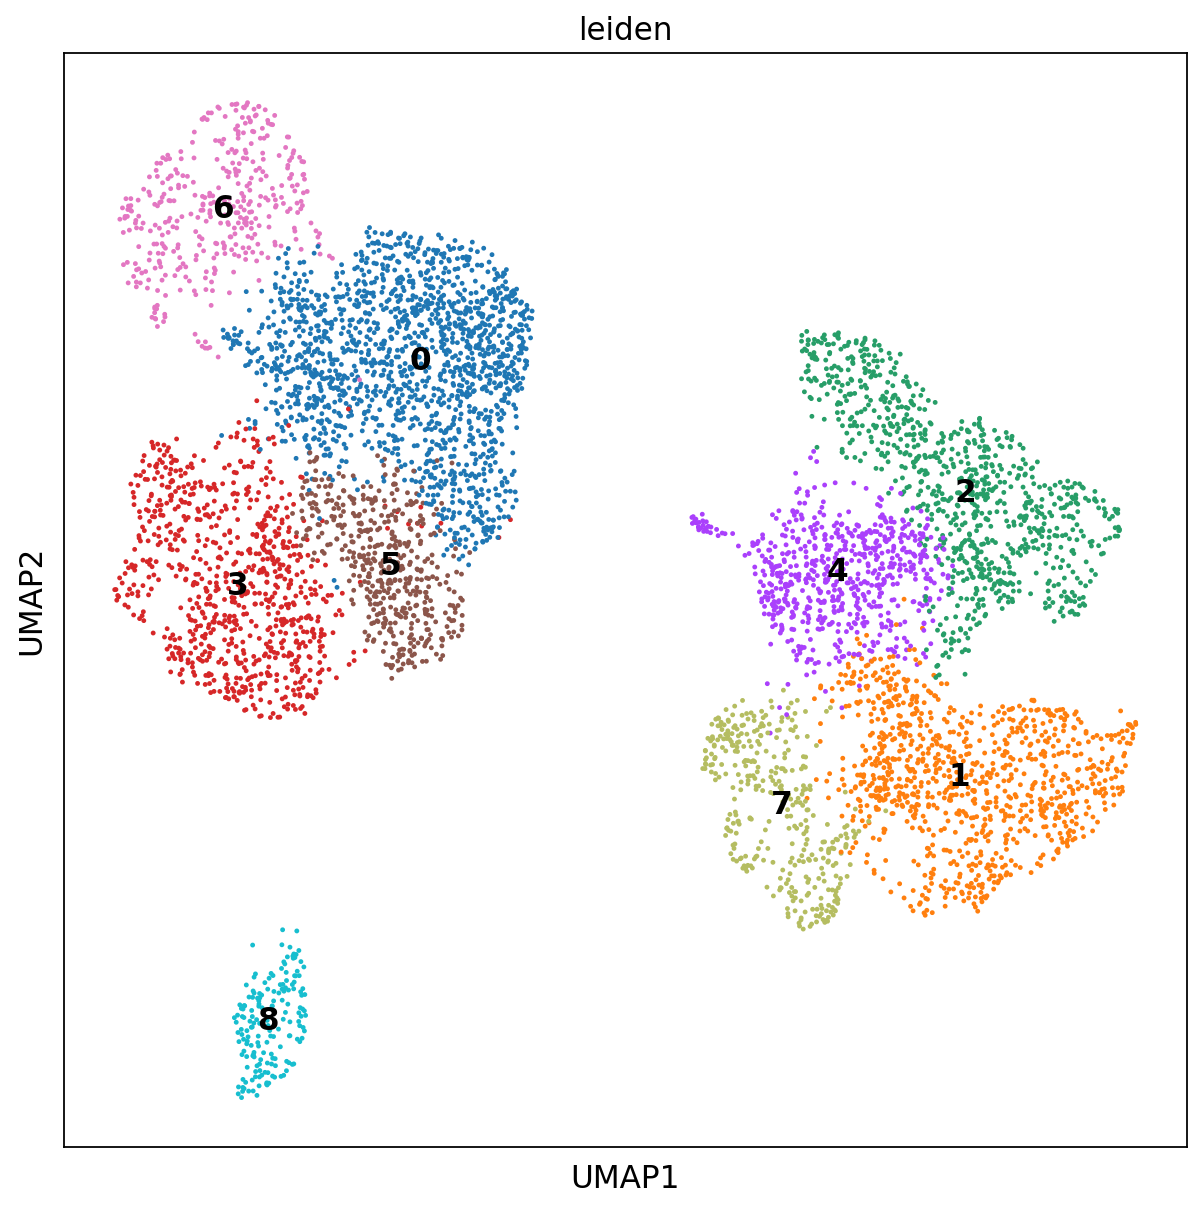

In [199]:
sc.pl.umap(corrected_adata, color=['leiden'], legend_loc = 'on data')

In [200]:
list_of_reg_cells = corrected_adata.obs.loc[corrected_adata.obs['leiden'] == '5']
list_of_reg_cells = list_of_reg_cells.index
list_of_bad_cells = corrected_adata.obs.loc[corrected_adata.obs['leiden'] == '19']
list_of_bad_cells = list_of_bad_cells.index

In [201]:
list_of_bad_cells = corrected_adata.obs.loc[corrected_adata.obs['leiden'] == '19']
list_of_bad_cells = list_of_bad_cells.index

In [202]:
sc.settings.figdir = '/data/passala/Plots_for_projects/Coexpressolog_paper_plots'

In [203]:
sc.set_figure_params(dpi_save = 500, figsize = (6,8))
#sc.pl.umap(corrected_adata, color= ['Species'], s=18, legend_fontsize = 10, title = "Cell Type", save = 'coexpressalog_only_maize_rice_species.svg')

In [204]:
sc.set_figure_params(dpi_save = 500, figsize = (6,8))
#sc.pl.umap(corrected_adata, color= ['Cell Cluster Annotation'], s=18, legend_fontsize = 10, title = "Cell Type", save = 'coexpressolog_only_integrated_maize_rice_cell_type.svg')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)


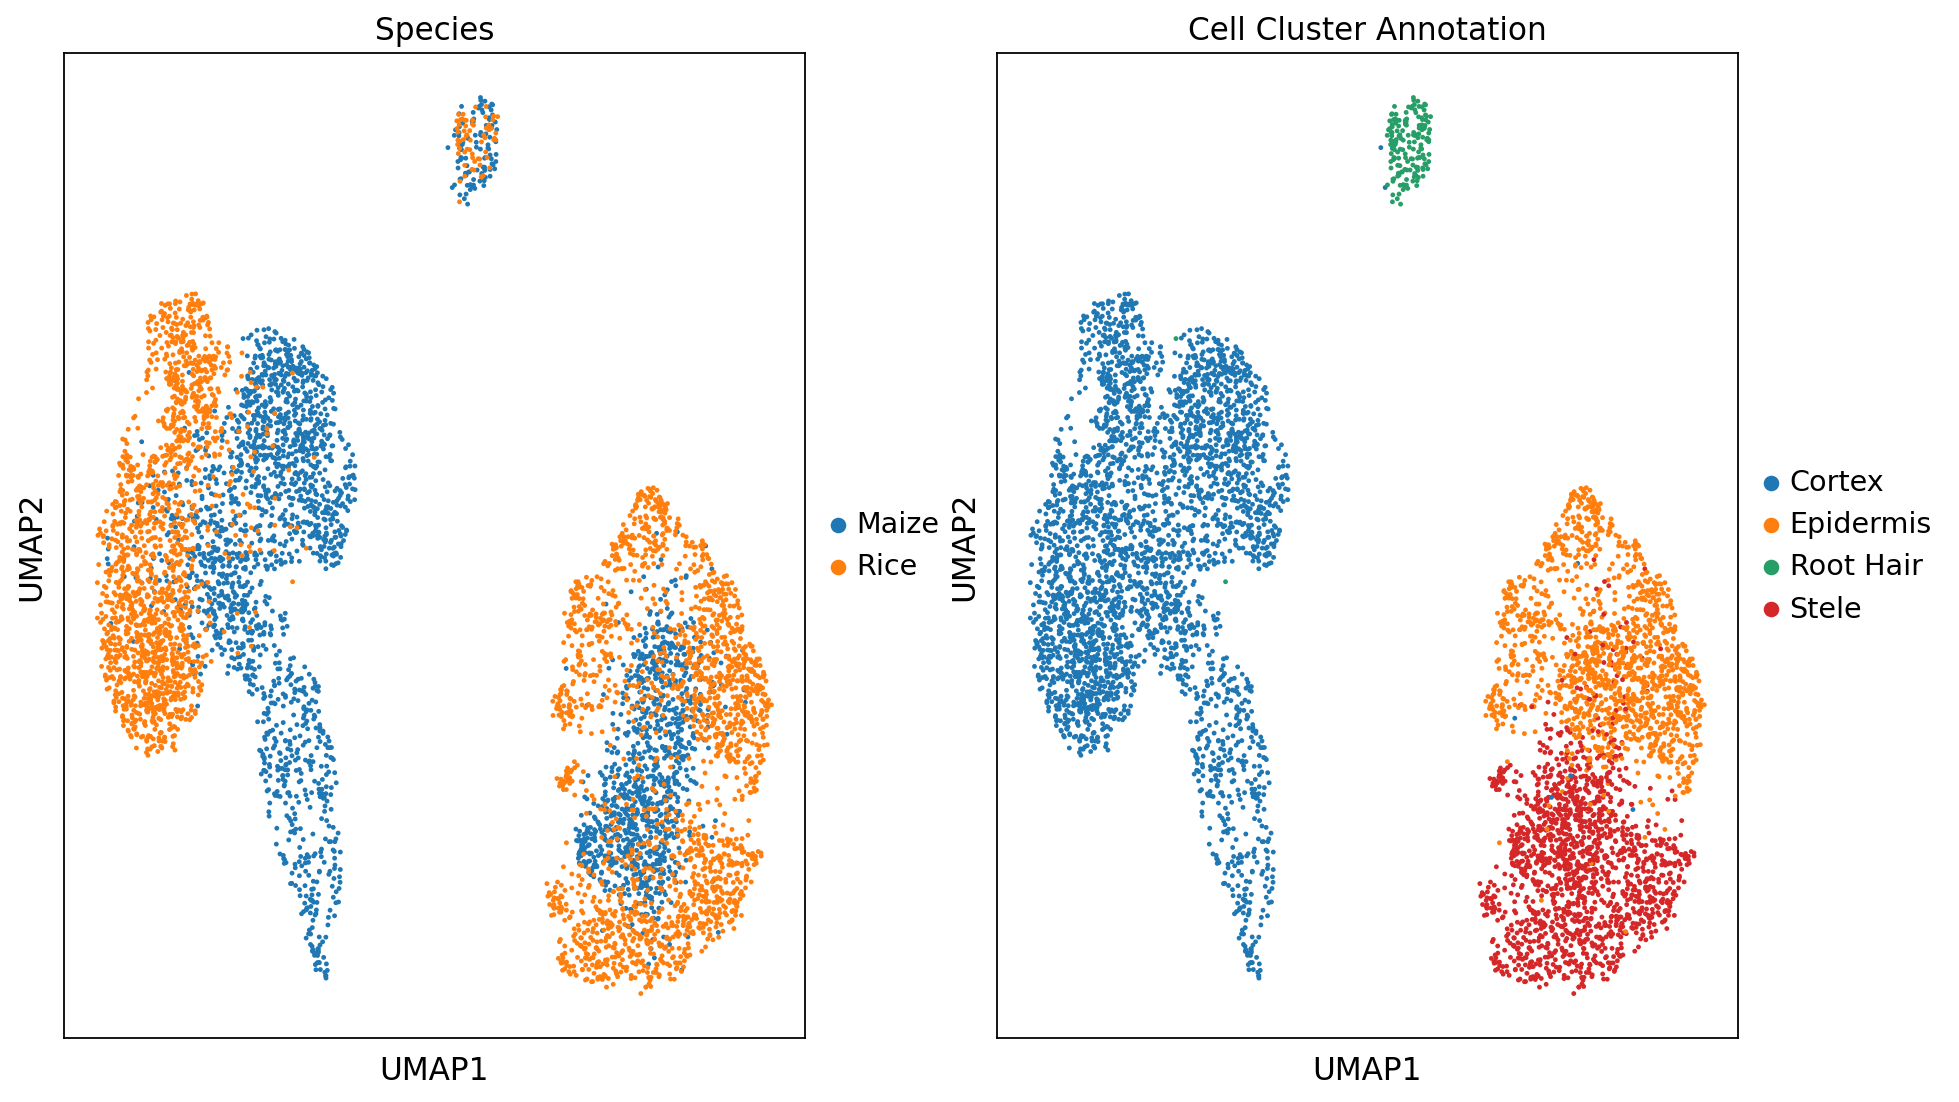

In [205]:
sc.pp.neighbors(corrected_adata, use_rep="corrected_latent")
sc.tl.umap(corrected_adata)
sc.pl.umap(corrected_adata, color=['Species', 'Cell Cluster Annotation'])

In [135]:
#sc.tl.leiden(corr)

In [136]:
import pymn

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


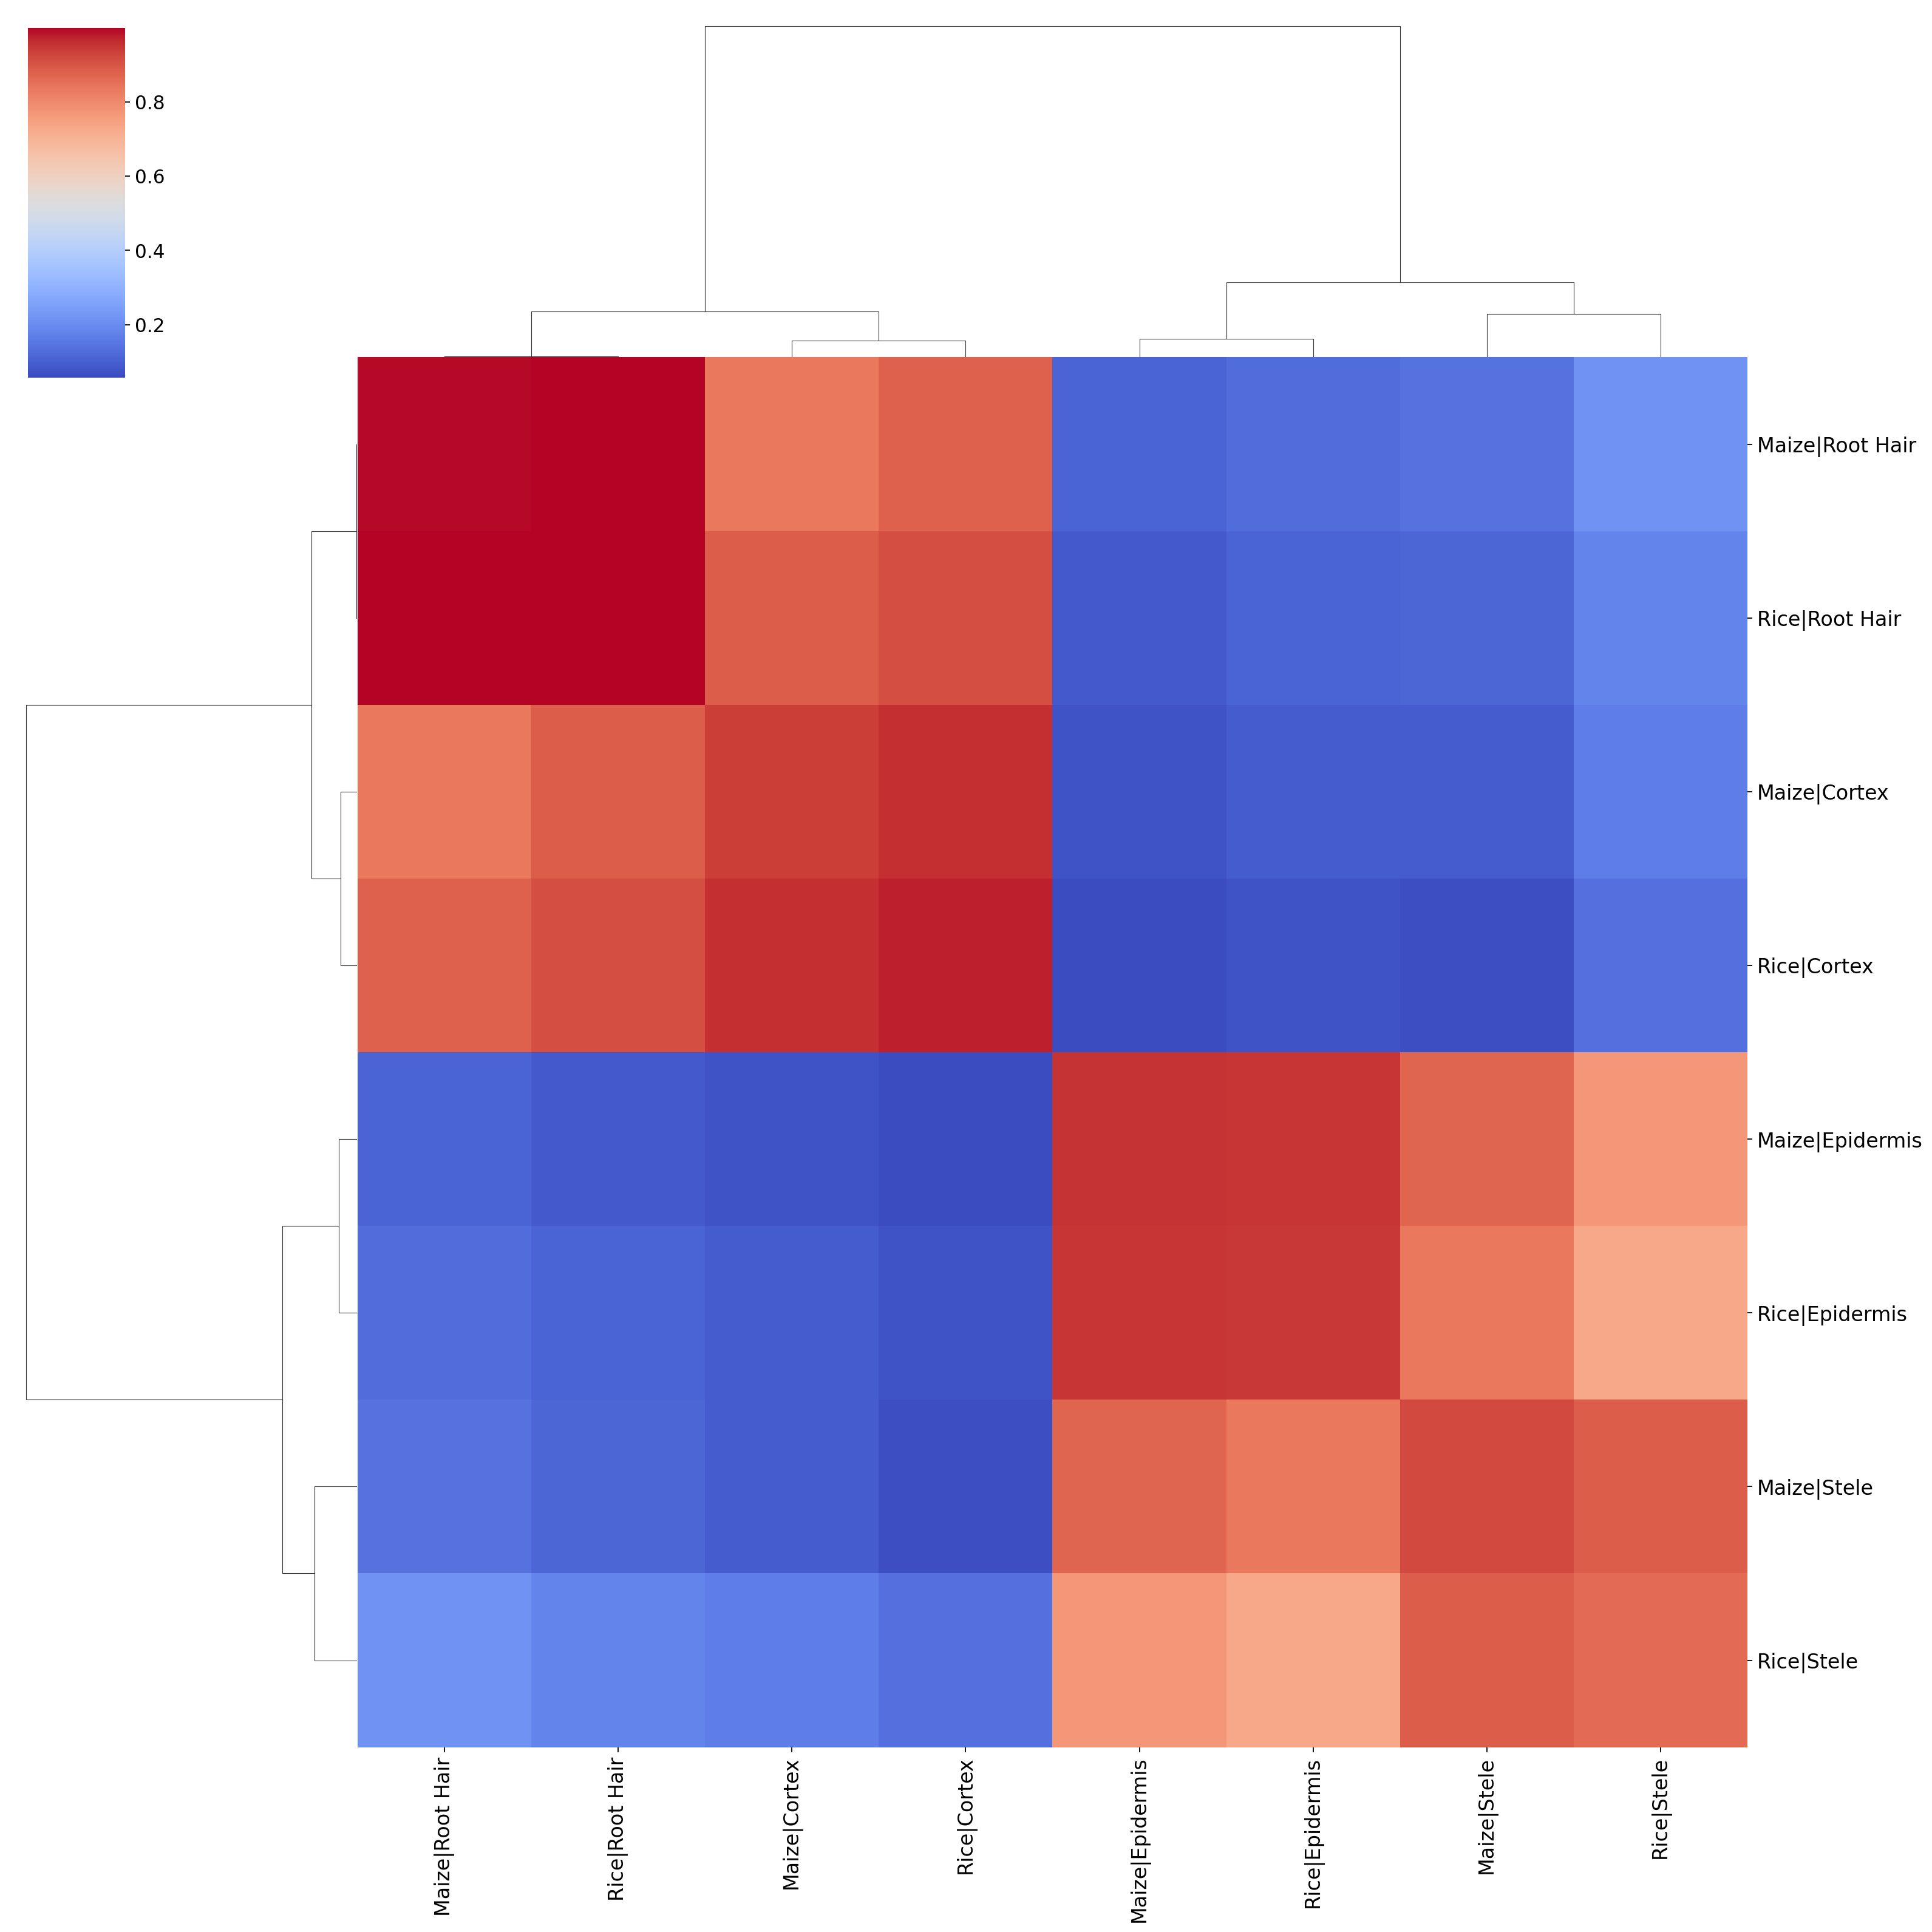

In [143]:
pymn.variableGenes(corrected_adata,study_col = 'Species')
pymn.MetaNeighborUS(corrected_adata,study_col = 'Species',ct_col = 'Cell Cluster Annotation')
g = pymn.plotMetaNeighborUS(corrected_adata,figsize = (20,20),cmap = 'coolwarm',fontsize = 15,show = False,)


In [132]:
corrected_adata.uns['MetaNeighborUS']

Maize|Cortex  Maize|Epidermis  Maize|Root Hair  Maize|Stele  \
Maize|Cortex         0.999998         0.092732         0.083697     0.044467   
Maize|Epidermis      0.092732         0.960140         0.754666     0.779086   
Maize|Root Hair      0.083697         0.754666         0.993175     0.853343   
Maize|Stele          0.044467         0.779086         0.853343     0.975991   
Rice|Cortex          0.999918         0.080727         0.180498     0.058315   
Rice|Epidermis       0.157603         0.957551         0.628713     0.729568   
Rice|Root Hair       0.129599         0.639395         0.993926     0.820352   
Rice|Stele           0.052005         0.676584         0.795224     0.965386   

                 Rice|Cortex  Rice|Epidermis  Rice|Root Hair  Rice|Stele  
Maize|Cortex        0.999918        0.157603        0.129599    0.052005  
Maize|Epidermis     0.080727        0.957551        0.639395    0.676584  
Maize|Root Hair     0.180498        0.628713        0.993926    0.795224  
Maize|Stele         0.058315        0.729568        0.820352    0.965386  
Rice|Cortex         0.999990        0.122470        0.252671    0.083848  
Rice|Epidermis      0.122470        0.956290        0.527142    0.624775  
Rice|Root Hair      0.252671        0.527142        0.994564    0.758493  
Rice|Stele          0.083848        0.624775        0.758493    0.967971

In [1]:
g.savefig('/data/passala/Plots_for_projects/Coexpressolog_paper_plots/updated_for_v11/update_rice_maize_coexpressalog_only_metaneighbor.svg')